In [ ]:
!git clone https://github.com/voorhs/AutoIntent.git

Cloning into 'AutoIntent'...
remote: Enumerating objects: 5875, done.
remote: Total 5875 (delta 0), reused 0 (delta 0), pack-reused 5875 (from 1)
Receiving objects: 100% (5875/5875), 15.25 MiB | 12.23 MiB/s, done.
Resolving deltas: 100% (3912/3912), done.


In [ ]:
!cd AutoIntent/ && pip install .

Processing /content/AutoIntent
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from autointent import Pipeline, Dataset
from autointent.modules import LinearScorer
from datasets import load_dataset
import random
import pandas as pd
import numpy as np
from collections import defaultdict
import os
from autointent.metrics.scoring import *
from autointent import Dataset
from autointent.generation import Generator
from autointent.generation.utterances import UtteranceGenerator
from autointent.generation.chat_templates import RussianSynthesizerTemplate, EnglishSynthesizerTemplate
from autointent.generation.utterances import UtteranceEvolver
from autointent.generation.chat_templates import GoofyEvolution, InformalEvolution
from collections import defaultdict


In [ ]:
API_KEY = "InnPracAutoIntent:Michael_Kabanov:fda2907f7a65478aa976d9144962c31b"
os.environ["OPENAI_API_KEY"] = API_KEY

In [ ]:
def pipe(data_x, data_y, test_x, test_y):
    seed = random.randint(1, 1303)
    scorer = LinearScorer(
    embedder_config="sergeyzh/rubert-tiny-turbo", cv=2, seed = seed
    )
    scorer.fit(data_x, data_y)
    probabilities = scorer.predict(test_x)
    metr = metrics(labels=test_y, predictions=probabilities)
    return metr

In [ ]:
banking77 =  Dataset.from_hub("DeepPavlov/banking77")
hwu64 =  Dataset.from_hub("DeepPavlov/hwu64")
snips =  Dataset.from_hub("DeepPavlov/snips")
massive =  Dataset.from_hub("DeepPavlov/massive")
minds14 =  Dataset.from_hub("DeepPavlov/minds14")
order = [('banking77', banking77), ('hwu64', hwu64), ('snips', snips), ('massive', massive), ('minds14', minds14)]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/3.66k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/290k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/88.8k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10003 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3080 [00:00<?, ? examples/s]

intents-00000-of-00001.parquet:   0%|          | 0.00/4.65k [00:00<?, ?B/s]

Generating intents split:   0%|          | 0/77 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/3.61k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/173k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/26.3k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8954 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1076 [00:00<?, ? examples/s]

intents-00000-of-00001.parquet:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

Generating intents split:   0%|          | 0/64 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/3.19k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/366k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/43.3k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/13084 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1400 [00:00<?, ? examples/s]

intents-00000-of-00001.parquet:   0%|          | 0.00/3.11k [00:00<?, ?B/s]

Generating intents split:   0%|          | 0/7 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/3.13k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/257k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/50.3k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/70.8k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/11492 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2031 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2968 [00:00<?, ? examples/s]

intents-00000-of-00001.parquet:   0%|          | 0.00/3.92k [00:00<?, ?B/s]

Generating intents split:   0%|          | 0/58 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/19.0k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/431 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/108 [00:00<?, ? examples/s]

intents-00000-of-00001.parquet:   0%|          | 0.00/2.93k [00:00<?, ?B/s]

Generating intents split:   0%|          | 0/14 [00:00<?, ? examples/s]

In [ ]:
from datasets.utils.logging import disable_progress_bar
disable_progress_bar()

In [ ]:
def create_shot_dataframe(full_dataset:Dataset, n=10, text_column='utterance', label_column='label'):
    utterances = []
    labels = []
    for label in np.unique(full_dataset['train']['label']):
        label_col = full_dataset['train'].filter(lambda x: x['label'] == label)
        utterances.extend(label_col['utterance'][:n])
        labels.extend(label_col['label'][:n])
    data_dict = {
    'train': [{
        'utterance': utterance,
        'label': label
    } for utterance, label in zip(utterances, labels)],

    'test': [{
        'utterance': utterance,
        'label': label
    } for utterance, label in zip(full_dataset['test']['utterance'], full_dataset['test']['label'])]
    }
    # print(data_dict)
    shot_dataset = Dataset.from_dict(data_dict)
    shot_dataset.intents = full_dataset.intents
    return shot_dataset


def create_shot_dataframe_random(full_dataset: Dataset, n=10, text_column='utterance', label_column='label', random_seed=None):
    if random_seed is not None:
        random.seed(random_seed)
        np.random.seed(random_seed)

    utterances = []
    labels = []

    unique_labels = np.unique(full_dataset['train'][label_column])

    for label in unique_labels:
        label_data = full_dataset['train'].filter(lambda x: x[label_column] == label).shuffle()

        sample_size = min(n, len(label_data))
        utterances.extend(label_data[text_column][:sample_size])
        labels.extend(label_data[label_column][:sample_size])
    data_dict = {
        'train': [{
            text_column: utterance,
            label_column: label
        } for utterance, label in zip(utterances, labels)],

        'test': [{
            text_column: utterance,
            label_column: label
        } for utterance, label in zip(full_dataset['test'][text_column], full_dataset['test'][label_column])]
    }

    shot_dataset = Dataset.from_dict(data_dict)
    shot_dataset.intents = full_dataset.intents

    return shot_dataset
train_df = create_shot_dataframe(snips, n=10)
print(train_df['train'])
print(train_df.intents)

Dataset({
    features: ['utterance', 'label'],
    num_rows: 70
})
[Intent(id=0, name='AddToPlaylist', tags=[], regex_full_match=[], regex_partial_match=[], description=None), Intent(id=1, name='BookRestaurant', tags=[], regex_full_match=[], regex_partial_match=[], description=None), Intent(id=2, name='GetWeather', tags=[], regex_full_match=[], regex_partial_match=[], description=None), Intent(id=3, name='PlayMusic', tags=[], regex_full_match=[], regex_partial_match=[], description=None), Intent(id=4, name='RateBook', tags=[], regex_full_match=[], regex_partial_match=[], description=None), Intent(id=5, name='SearchCreativeWork', tags=[], regex_full_match=[], regex_partial_match=[], description=None), Intent(id=6, name='SearchScreeningEvent', tags=[], regex_full_match=[], regex_partial_match=[], description=None)]


In [ ]:
#?
def generateByUtteranceGenerator(data:Dataset):
    generator = Generator(base_url='http://193.187.173.33:8002/api/providers/openai/v1', model_name="gpt-3.5-turbo" )
    prompt = EnglishSynthesizerTemplate(data)
    augmenter = UtteranceGenerator(generator, prompt_maker=prompt)
    vals = augmenter.augment(data)
    return data
def generateByUtteranceEnvolver(data:Dataset):
    generator = Generator(base_url='http://193.187.173.33:8002/api/providers/openai/v1', model_name="gpt-3.5-turbo" )
    evolver = UtteranceEvolver(generator, prompt_makers=[GoofyEvolution(), InformalEvolution()])
    new_data = evolver.augment(data)
    return data




In [ ]:
def metrics(labels, predictions):
    accuracy = scoring_accuracy(labels=labels, scores=predictions)
    f1 = scoring_f1(labels=labels, scores=predictions)
    precision = scoring_precision(labels=labels, scores=predictions)
    recall = scoring_recall(labels=labels, scores=predictions)
    return {'ac':accuracy, "f1":f1, "pre":precision, "recall":recall}

In [ ]:
def show_diff(baseline_data, test, data_adv):
    base_result = pipe(
        data_x=baseline_data['train']['utterance'],
        data_y=baseline_data['train']['label'],
        test_x=test['test']['utterance'],
        test_y=test['test']['label']
    )

    adv_result = pipe(
        data_x=data_adv['train']['utterance'],
        data_y=data_adv['train']['label'],
        test_x=test['test']['utterance'],
        test_y=test['test']['label']
    )

    print("Few-shot:", base_result)
    print("augmentation:", adv_result)
    return (base_result, adv_result)

In [ ]:
def base_augment(data:Dataset, test_data:Dataset):
    generator = Generator(base_url='http://193.187.173.33:8002/api/providers/openai/v1', model_name="gpt-3.5-turbo" ,
                          max_tokens=500)
    prompt = EnglishSynthesizerTemplate(data)
    augmenter = UtteranceGenerator(generator, prompt_maker=prompt)
    vals = augmenter.augment(data, n_generations=5)
    base_result = pipe(
        data_x=data['train']['utterance'],
        data_y=data['train']['label'],
        test_x=data['test']['utterance'],
        test_y=data['test']['label']
    )
    return base_result

base_augment_snips_5_plus_5 = []
for i in range(7):
    shottt = create_shot_dataframe(snips, n=5)
    base_augment_snips_5_plus_5.append(base_augment(shottt, snips))

modules.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/431k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/712 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/117M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/732 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/196 [00:00<?, ?B/s]

In [ ]:
base_augment_snips_5_plus_5 # посмотрим на скоры базовой библиотеки, чтобы часто не перезапускать

[{'ac': 0.8571428571428571,
  'f1': 0.8532302894898953,
  'pre': 0.8547667726670652,
  'recall': 0.8571428571428571},
 {'ac': 0.8685714285714285,
  'f1': 0.8669111656005424,
  'pre': 0.8674181368213626,
  'recall': 0.8685714285714285},
 {'ac': 0.8685714285714285,
  'f1': 0.8640715635294139,
  'pre': 0.8697815676029826,
  'recall': 0.8685714285714285},
 {'ac': 0.8428571428571429,
  'f1': 0.8362846578635653,
  'pre': 0.8454032179012099,
  'recall': 0.8428571428571429},
 {'ac': 0.8721428571428571,
  'f1': 0.8695742315288583,
  'pre': 0.8708799593367899,
  'recall': 0.8721428571428571},
 {'ac': 0.8414285714285714,
  'f1': 0.8342910777630685,
  'pre': 0.8374549451850337,
  'recall': 0.8414285714285715},
 {'ac': 0.8321428571428572,
  'f1': 0.8281594923728488,
  'pre': 0.8325402050496188,
  'recall': 0.8321428571428572}]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
import os

def run_and_plot_experiments(n_runs: int, augmenter, dataset, show_diff_fn, gen, base_scores: list[dict], new_elems=5, title="Результаты эксперимента", save_dir="plots") -> None:
    os.makedirs(save_dir, exist_ok=True)

    all_metrics = []
    size_stats = []
    class_distributions = []

    for i in range(n_runs):
        print(f"\n🔁 Запуск {i + 1} из {n_runs}")
        data = create_shot_dataframe(dataset, n=5)
        baseline = create_shot_dataframe_random(dataset, n=5)

        augmenter.generate(data, n_final_per_class=new_elems, update_split=True)
        before, after = show_diff_fn(baseline_data=baseline, data_adv=data, test=dataset)

        for metric_name in before:
            all_metrics.extend([
                {"run": i + 1, "metric": metric_name, "value": before[metric_name], "stage": "До аугментации"},
                {"run": i + 1, "metric": metric_name, "value": after[metric_name], "stage": "После аугментации"}
            ])

        size_stats.extend([
            {"run": i + 1, "stage": "До аугментации", "size": len(baseline["train"])},
            {"run": i + 1, "stage": "После аугментации", "size": len(data["train"])}
        ])

        label_counts = Counter(sample["label"] for sample in data["train"])
        for label, count in label_counts.items():
            class_distributions.append({
                "run": i + 1,
                "label": label,
                "count": count
            })

    for i, score in enumerate(base_scores, start=1):
        for metric_name, value in score.items():
            all_metrics.append({
                "run": i,
                "metric": metric_name,
                "value": value,
                "stage": "Базовая генерация"
            })

    df_metrics = pd.DataFrame(all_metrics)
    df_sizes = pd.DataFrame(size_stats)
    df_class_balance = pd.DataFrame(class_distributions)

    # === 📊 Метрики (до/после/база)
    sns.set(style="whitegrid", font_scale=1.2)
    metric_order = ["ac", "f1", "pre", "recall"]
    metric_labels = {"ac": "Accuracy", "f1": "F1-score", "pre": "Precision", "recall": "Recall"}

    fig, axes = plt.subplots(1, len(metric_order), figsize=(5.5 * len(metric_order), 6))

    for i, metric in enumerate(metric_order):
        ax = axes[i]
        data = df_metrics[df_metrics["metric"] == metric]
        sns.boxplot(data=data, x="stage", y="value", ax=ax, palette="pastel")
        ax.set_title(f"{metric_labels[metric]}")
        ax.set_xlabel("")
        ax.set_ylabel("Значение метрики")
        ax.tick_params(axis='x', labelrotation=15)
        ax.grid(True)

    fig.suptitle(f"📊 {title}: Сравнение метрик", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85, bottom=0.15)
    plt.savefig(os.path.join(save_dir, f"{title}_metrics.png"), dpi=300)
    plt.show()

    # === 📈 Размер выборки
    plt.figure(figsize=(6, 5))
    sns.boxplot(data=df_sizes, x="stage", y="size", palette="muted")
    plt.title(f"📦 {title}: Размер выборки до и после")
    plt.xlabel("")
    plt.ylabel("Кол-во примеров в train")
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig(os.path.join(save_dir, f"{title}_sample_size.png"), dpi=300)
    plt.show()

    # === 📊 Баланс классов
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_class_balance, x="label", y="count", palette="coolwarm")
    plt.title(f"🔢 {title}: Распределение классов после аугментации")
    plt.xlabel("ID класса")
    plt.ylabel("Кол-во примеров")
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig(os.path.join(save_dir, f"{title}_class_balance.png"), dpi=300)
    plt.show()


chain of thought
Результы не очень

In [ ]:
from autointent import Dataset
from autointent.custom_types import Split
from autointent.generation import Generator
from autointent.schemas import Sample
from datasets import concatenate_datasets, Dataset as HFDataset
from collections import defaultdict

In [ ]:
class ChainOfThoughtUtteranceGenerator(UtteranceGenerator):
    def __init__(self, generator: Generator, async_mode: bool = False):
        self.async_mode = async_mode
        self.generator = generator

    def _build_reasoning_prompt(self, example: str, intent_name: str) -> Message:
        content = (
            f"You are analyzing an utterance related to the intent '{intent_name}'.\n"
            f"Utterance: \"{example}\"\n\n"
            "Step 1: Identify important keywords.\n"
            "Step 2: Suggest alternative phrasings for those keywords.\n"
            "Step 3: Describe how the utterance could be rephrased without changing the intent.\n\n"
            "Be specific and detailed."
        )
        return Message(role=Role.USER, content=content)


    def _build_rewriting_prompt(
        self, example: str, reasoning: str, intent_name: str, n_generations: int
    ) -> Message:
        content = (
            f"Intent name: {intent_name}\n"
            f"Original utterance: \"{example}\"\n\n"
            f"Reasoning:\n{reasoning}\n\n"
            f"Now, using the reasoning above, generate {n_generations} paraphrased versions of the original utterance "
            f"that preserve its meaning and intent. List them as a numbered list."
        )
        return Message(role=Role.USER, content=content)

    def build_chain_of_thought_messages(self, examples: list[str], n_generations: int, intent_name) -> list[Message]:

        intent_block = f"Intent name: {intent_name}\n\n" if intent_name else ""

        example_block = "\n".join(f"{i+1}. {utt}" for i, utt in enumerate(examples))

        content = (
            "You are a language model that augments data by paraphrasing user utterances with minimal semantic drift.\n"
            "Step 1: Identify important words in each utterance and suggest semantically similar alternatives.\n"
            "Step 2: Use those substitutions to rewrite each utterance with the same intent.\n\n"
            f"{intent_block}"
            f"Example Utterances:\n{example_block}\n\n"
            f"Please generate {n_generations} new paraphrased utterances that follow the same intent using the two steps above."
        )

        return [Message(role=Role.USER, content=content)]

    def _extract_utterances(self, response_text: str) -> list[str]:
        lines = response_text.strip().split("\n")
        utterances = []
        for line in lines:
            line = line.strip()
            if line and line[0].isdigit() and "." in line:
                try:
                    _, text = line.split(".", 1)
                    utterances.append(text.strip())
                except ValueError:
                    continue
        return utterances


    def generate(
    self,
    dataset: Dataset,
    split_name: str = Split.TRAIN,
    n_shot: int = 5,
    n_final_per_class: int = 5,
    update_split: bool = True,
) -> list[Sample]:
        original_split = dataset[split_name]
        utterances_by_intent = defaultdict(list)
        id_to_name = {intent.id: intent.name for intent in dataset.intents}

        for sample in original_split:
            utterances_by_intent[sample["label"]].append(sample["utterance"])

        new_samples = []

        for intent_id, utterances in utterances_by_intent.items():
            intent_name = id_to_name[intent_id]
            few_shots = utterances[:n_shot]

            print(f"🔸 Generating for intent: {intent_name} (id={intent_id})")

            messages = self.build_chain_of_thought_messages(
                examples=few_shots,
                n_generations=n_final_per_class,
                intent_name=intent_name
            )

            response = self.generator.get_chat_completion(messages)
            generated_utterances = self._extract_utterances(response)

            new_samples.extend([
                {Dataset.label_feature: intent_id, Dataset.utterance_feature: ut}
                for ut in generated_utterances
            ])

        if update_split:
            generated_split = HFDataset.from_list(new_samples)
            dataset[split_name] = concatenate_datasets([original_split, generated_split])

        return [Sample(**sample) for sample in new_samples]



🔁 Запуск 1 из 7
🔸 Generating for intent: AddToPlaylist (id=0)
🔸 Generating for intent: BookRestaurant (id=1)
🔸 Generating for intent: GetWeather (id=2)
🔸 Generating for intent: PlayMusic (id=3)
🔸 Generating for intent: RateBook (id=4)
🔸 Generating for intent: SearchCreativeWork (id=5)
🔸 Generating for intent: SearchScreeningEvent (id=6)
Few-shot: {'ac': 0.85, 'f1': 0.8486847967958394, 'pre': 0.8519066009810364, 'recall': 0.85}
augmentation: {'ac': 0.8078571428571428, 'f1': 0.8016835521512294, 'pre': 0.82766082971186, 'recall': 0.8078571428571429}

🔁 Запуск 2 из 7
🔸 Generating for intent: AddToPlaylist (id=0)
🔸 Generating for intent: BookRestaurant (id=1)
🔸 Generating for intent: GetWeather (id=2)
🔸 Generating for intent: PlayMusic (id=3)
🔸 Generating for intent: RateBook (id=4)
🔸 Generating for intent: SearchCreativeWork (id=5)
🔸 Generating for intent: SearchScreeningEvent (id=6)
Few-shot: {'ac': 0.8471428571428572, 'f1': 0.8464375622611545, 'pre': 0.8465729100233206, 'recall': 0.8471

<ipython-input-78-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="stage", y="value", ax=ax, palette="pastel")
<ipython-input-78-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="stage", y="value", ax=ax, palette="pastel")
<ipython-input-78-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="stage", y="value", ax=ax, palette="pastel")
<ipython-input-78-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

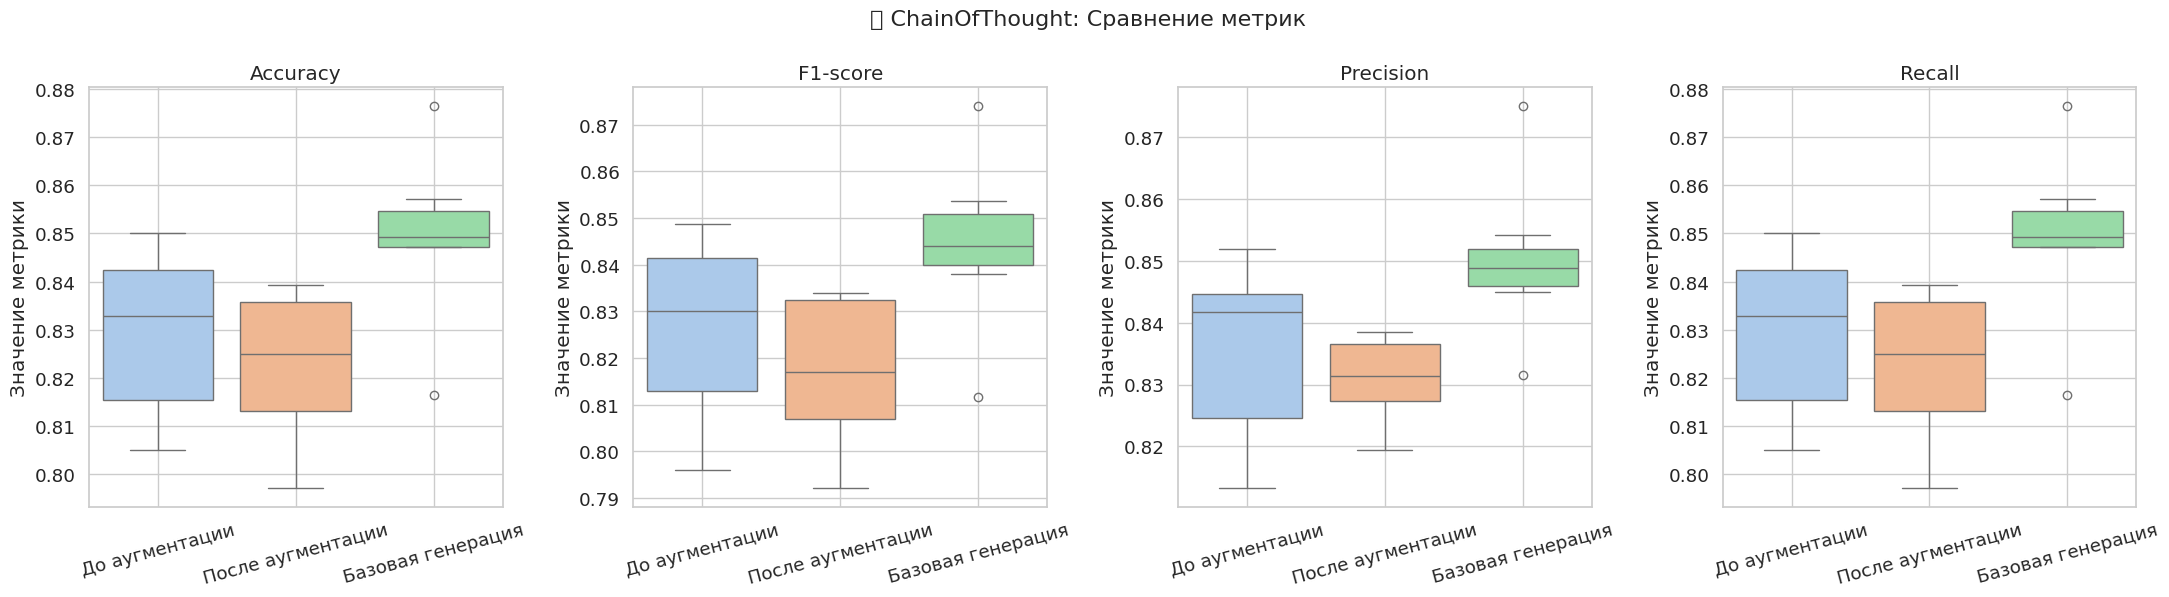

<ipython-input-78-5313fb8f192f>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sizes, x="stage", y="size", palette="muted")
<ipython-input-78-5313fb8f192f>:84: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


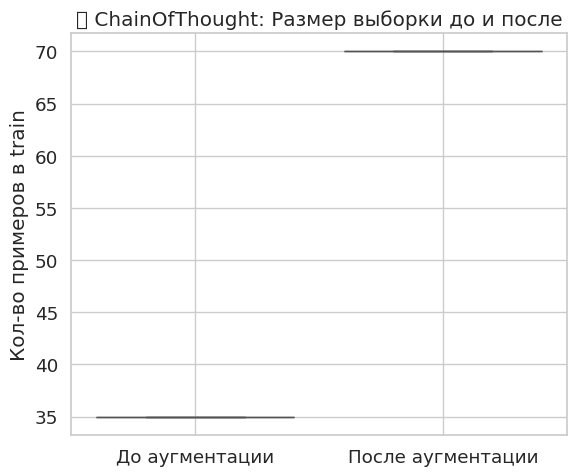

<ipython-input-78-5313fb8f192f>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_class_balance, x="label", y="count", palette="coolwarm")
<ipython-input-78-5313fb8f192f>:95: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


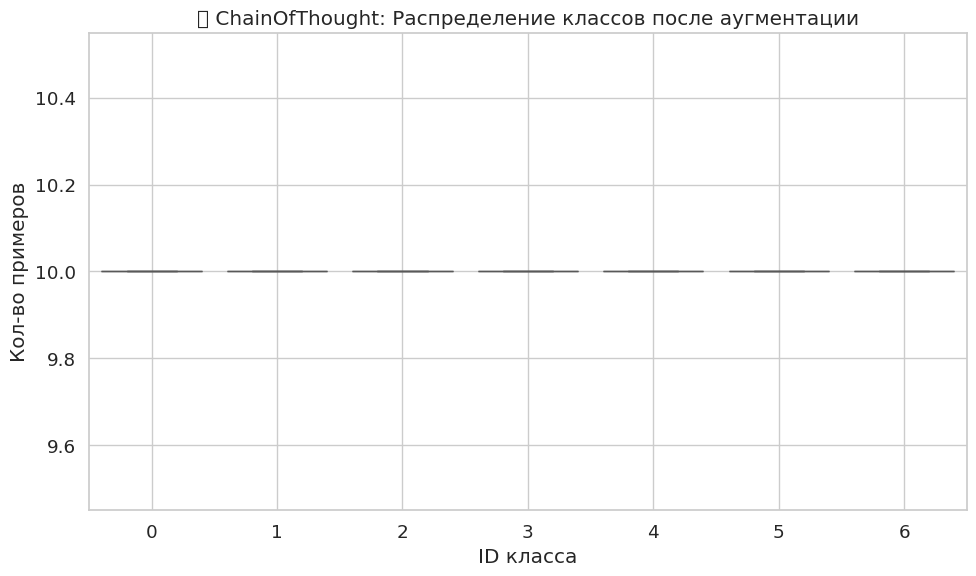

In [ ]:
generator_350 = Generator(
    base_url='http://193.187.173.33:8002/api/providers/openai/v1',
    model_name='gpt-3.5-turbo',
    max_tokens = 350
)
augmenter = ChainOfThoughtUtteranceGenerator(generator_350)
generator_350 = Generator(
    base_url='http://193.187.173.33:8002/api/providers/openai/v1',
    model_name='gpt-3.5-turbo',
    max_tokens =350
)
run_and_plot_experiments(n_runs = 7, augmenter = augmenter, dataset = snips, show_diff_fn = show_diff, gen=generator_350, base_scores=base_augment_snips_5_plus_5, title="ChainOfThought")

Идея один:
Генератор получает оригинальную фразу и имя интента, и создает переформулированную версию, которую критик мог бы принять за написанную человеком.

Критик анализирует результат и выдает бинарную оценку: human или generated.

Если результат отклоняется (generated), то он сохраняется как плохой.

На следующем шаге генератору передаются все предыдущие неудачные попытки, и он формирует новый запрос с учетом этих данных:

Он видит, какие формулировки не сработали;

Он старается избегать тех же языковых паттернов;

Цикл повторяется максимум 3 раза. Если ни одна попытка не обманула критика, то добавляется последний результат как «наименее плохой».
Жрёт достаточно много, так как на каждый сгенерированныый utterance тратить как минимум по обращению к llm

In [ ]:
from typing import Dict, Any, List, ClassVar
from autointent.generation.chat_templates import BaseSynthesizerTemplate
from autointent.generation.chat_templates import Message, Role
from autointent import Dataset
from autointent.custom_types import Split
from autointent.generation import Generator
from autointent.schemas import Sample
from datasets import concatenate_datasets, Dataset as HFDataset
from collections import defaultdict
from sentence_transformers import SentenceTransformer, util
import re
from typing import Dict, List
from collections import defaultdict
class CriticFirst:
    def __init__(self, generator: Generator):
        self.generator = generator

    def build_classification_prompt(self, example: str, intent_name: str) -> Message:
        content = (
            f"You are a critic that determines whether a user utterance was written by a human or generated by a language model.\n"
            f"Intent: {intent_name}\n"
            f"Utterance: \"{example}\"\n\n"
            "Respond with a one-word classification: `human` or `generated`. NO  EXPLANATION."
        )
        return Message(role=Role.USER, content=content)

    def is_human(self, utterance: str, intent_name: str) -> bool:
        prompt = self.build_classification_prompt(utterance, intent_name)
        response = self.generator.get_chat_completion([prompt])
        return response.strip().lower().startswith("human")


class CritlUtteranceGenerator(UtteranceGenerator):
    def __init__(self, generator: Generator, critic: CriticFirst):
        self.generator = generator
        self.critic = critic

    def generate(self, dataset: Dataset, split_name: str = Split.TRAIN, update_split: bool = True, n_final_per_class: int = 5) -> list[Sample]:
        original_split = dataset[split_name]
        id_to_name = {intent.id: intent.name for intent in dataset.intents}
        new_samples = []

        class_to_samples = defaultdict(list)
        for sample in original_split:
            class_to_samples[sample["label"]].append(sample["utterance"])

        for intent_id, intent_name in id_to_name.items():
            print(f"\nGenerating for intent: {intent_name} (ID: {intent_id})")
            generated_count = 0
            attempt = 0

            seed_utterances = class_to_samples.get(intent_id, [])
            if not seed_utterances:
                print(f"Warning: No seed utterances for intent {intent_name}")
                continue

            while generated_count < n_final_per_class and attempt < n_final_per_class * 3:
                attempt += 1
                seed = seed_utterances[attempt % len(seed_utterances)]

                rejected = []
                for _ in range(3):
                    prompt = self._build_adversarial_prompt(seed, intent_name, rejected)
                    generated = self.generator.get_chat_completion([prompt]).strip()

                    if self.critic.is_human(generated, intent_name):
                        print(f"✓ [{generated_count+1}/{n_final_per_class}] Accepted: {generated}")
                        new_samples.append({
                            Dataset.label_feature: intent_id,
                            Dataset.utterance_feature: generated
                        })
                        generated_count += 1
                        break
                    else:
                        print(f"✗ Attempt {attempt}: Rejected: {generated}")
                        rejected.append(generated)

                if generated_count >= n_final_per_class:
                    break

        if update_split:
            generated_split = HFDataset.from_list(new_samples)
            dataset[split_name] = concatenate_datasets([original_split, generated_split])

        return [Sample(**sample) for sample in new_samples]
    def _build_adversarial_prompt(self, example: str, intent_name: str, rejected: list[str]) -> Message:
        rejected_block = "\n".join(f"- {r}" for r in rejected) if rejected else "None"

        content = (
            f"Your task is to rewrite the following user utterance so that it sounds as natural and human-like as possible, "
            f"while preserving its original intent: '{intent_name}'.\n\n"
            f"Original utterance: \"{example}\"\n\n"
            f"The following previous attempts were classified as machine-generated and rejected:\n{rejected_block}\n\n"
            "Try to write something that would pass as written by a real human. Output a single version only.\n"
            "IMPORTANT: You must modify the original utterance."
        )
        return Message(role=Role.USER, content=content)


🔁 Запуск 1 из 7

Generating for intent: AddToPlaylist (ID: 0)
✓ [1/5] Accepted: Please add "United Abominations" to my rare groove playlist.
✓ [2/5] Accepted: Can you please add the song by Misato Watanabe to the Trapeo playlist?
✓ [3/5] Accepted: Please add this artist to my "This is Miguel Bosé" playlist.
✓ [4/5] Accepted: Please add "Heresy" and "The Hotel Choir" to the acoustic playlist for this evening.
✓ [5/5] Accepted: Please add Don and Sherri to my playlist called "Meditate to Sounds of Nature".

Generating for intent: BookRestaurant (ID: 1)
✓ [1/5] Accepted: I'd like to make a reservation at the Union Oyster House in Guanica, Puerto Rico.
✓ [2/5] Accepted: I need to make a reservation at a restaurant that's not near 138th St.
✓ [3/5] Accepted: Can you help me locate a creole restaurant?
✓ [4/5] Accepted: I'd like to make a reservation for seven people at The Fry Bread House in Olive.
✓ [5/5] Accepted: I'd like to book a table for six at a highly-rated brasserie.

Generating 

<ipython-input-78-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="stage", y="value", ax=ax, palette="pastel")
<ipython-input-78-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="stage", y="value", ax=ax, palette="pastel")
<ipython-input-78-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="stage", y="value", ax=ax, palette="pastel")
<ipython-input-78-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

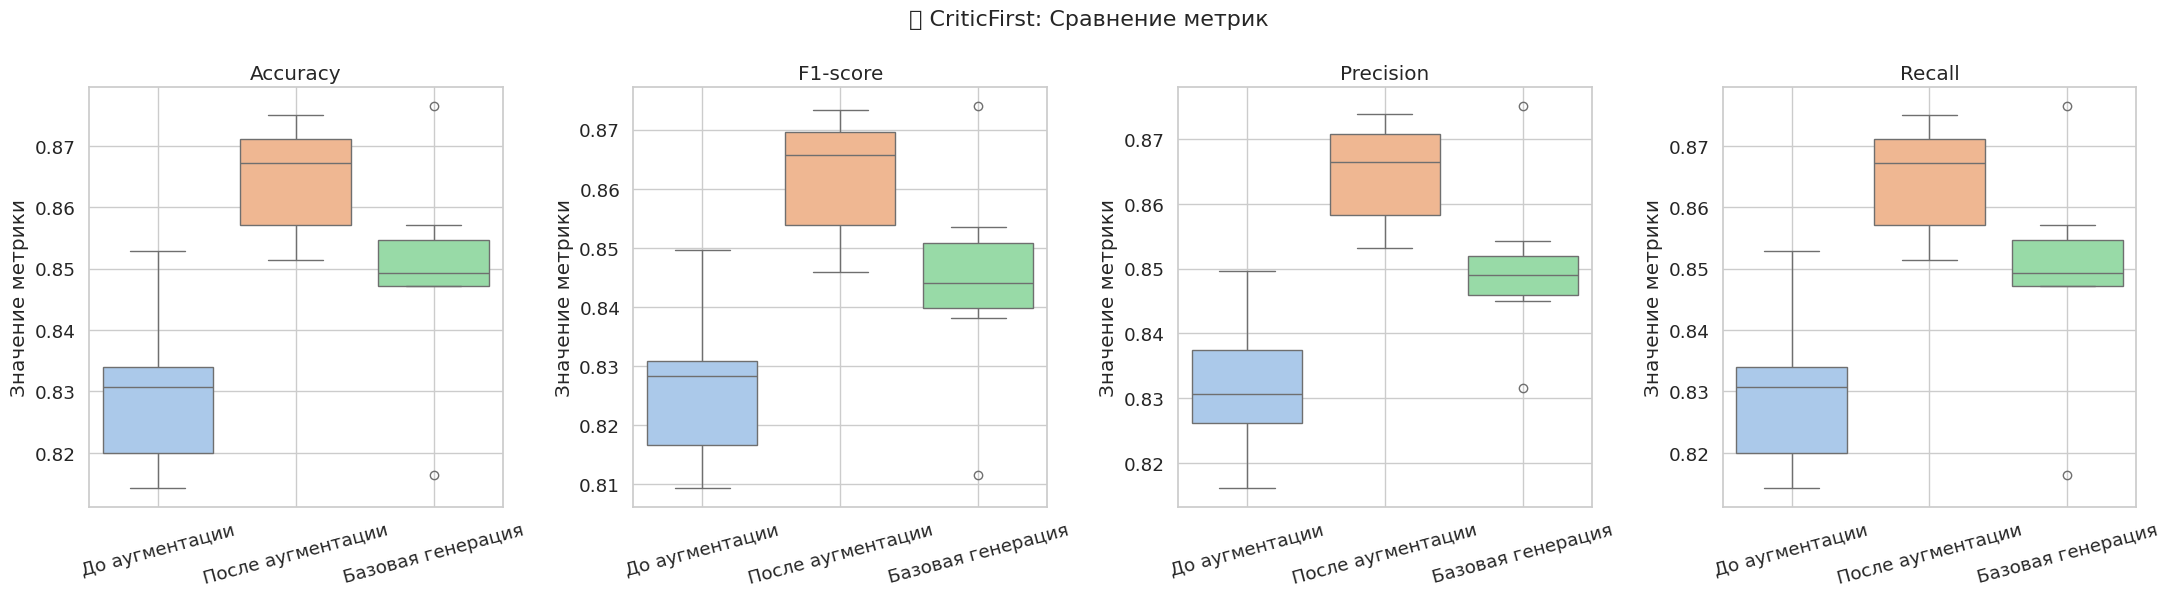

<ipython-input-78-5313fb8f192f>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sizes, x="stage", y="size", palette="muted")
<ipython-input-78-5313fb8f192f>:84: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


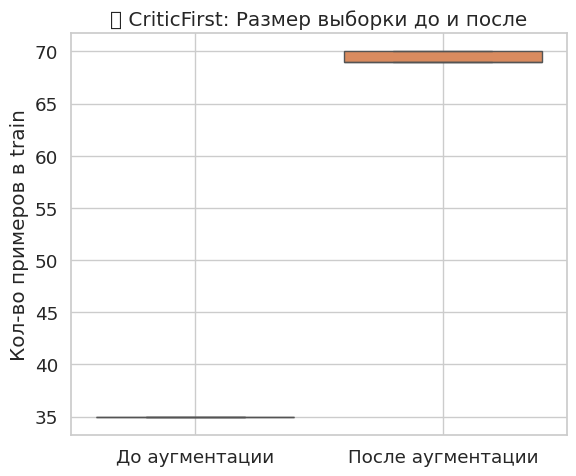

<ipython-input-78-5313fb8f192f>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_class_balance, x="label", y="count", palette="coolwarm")
<ipython-input-78-5313fb8f192f>:95: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


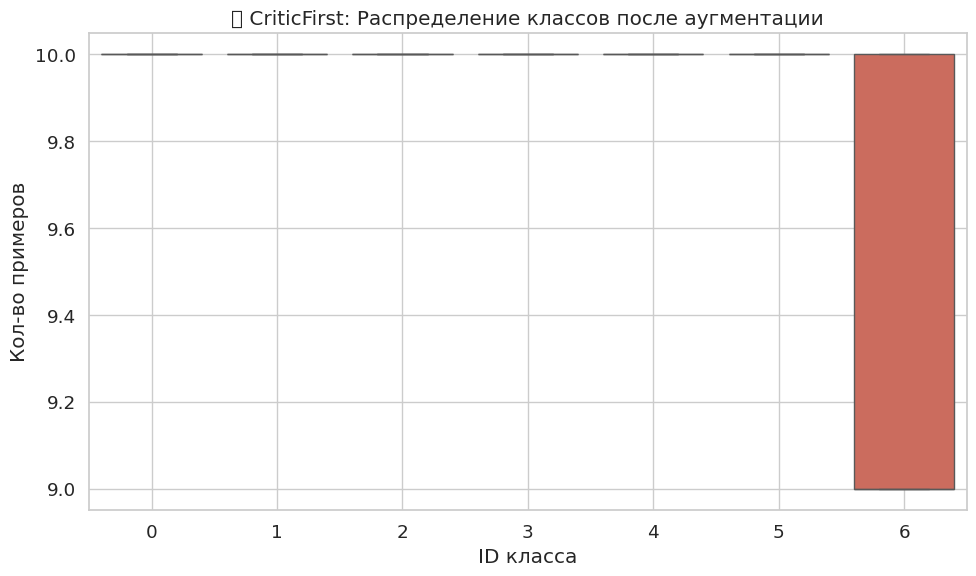

In [ ]:
generator_350 = Generator(
    base_url='http://193.187.173.33:8002/api/providers/openai/v1',
    model_name='gpt-3.5-turbo',
    max_tokens = 350
)
critic = CriticFirst(generator_350)

first_crit_gen = CritlUtteranceGenerator(generator_350, critic)
run_and_plot_experiments(n_runs = 7, title="CriticFirst", base_scores=base_augment_snips_5_plus_5,
                         augmenter = first_crit_gen, dataset = snips, show_diff_fn = show_diff, gen=generator_350)

теперь будем выбирать лучшие:
1. Генератор:
Получает оригинальное высказывание и название интента.

Создаёт несколько переформулированных вариантов (5), стараясь сделать их максимально естественными и похожими на речь человека.

При этом сохраняется семантика — то есть выражается тот же интент, но иными словами.

2. Критик (Critic):
Получает все сгенерированные варианты.

Сравнивает их и выбирает наиболее "человеческий" (human-like) с его точки зрения.

Выбор критика считается финальным и используется как результат.

In [ ]:
class AdversarialClassLevelGeneratorBase(UtteranceGenerator):
    def __init__(self, generator: Generator):
        self.generator = generator

    def _build_class_level_prompt(self, examples: list[str], intent_name: str, n_generate: int) -> Message:
        example_block = "\n".join(f"{i+1}. {ex}" for i, ex in enumerate(examples))
        content = (
            f"You are generating paraphrased user utterances for the intent: '{intent_name}'.\n\n"
            f"they should cover the maximum number of situations that fit this intent."
            f"Here are some examples of how users typically phrase this intent:\n"
            f"{example_block}\n\n"
            f"Please generate {n_generate} new, diverse, natural-sounding utterances with the same intent.\n"
            f"Make sure they do not repeat the above and sound as if written by different humans.\n"
            f"Output as a numbered list."
        )
        return Message(role=Role.USER, content=content)

    def _build_critic_prompt(self, candidates: list[str], intent_name: str, n_best: int = 3) -> Message:
        # limited = candidates[:10]
        options = "\n".join(f"{i+1}. {s}" for i, s in enumerate(candidates))
        content = (
            f"You are a critic. You are given multiple paraphrased user utterances for intent: '{intent_name}'.\n\n"
            f"Select the {n_best} most natural and human-like ones.\n"
            f"List only their numbers separated by commas (e.g., 1, 3, 4). DO NOT explain.\n\n"
            f"Candidates:\n{options}"
        )
        return Message(role=Role.USER, content=content)

    def generate(self, dataset: Dataset, split_name: str = Split.TRAIN, n_final_per_class: int = 3, update_split: bool = True) -> list[Sample]:
        n_generate = n_final_per_class * 2;
        original_split = dataset[split_name]
        id_to_name = {intent.id: intent.name for intent in dataset.intents}
        utterances_by_intent = defaultdict(list)

        for sample in original_split:
            utterances_by_intent[sample["label"]].append(sample["utterance"])

        new_samples = []

        for intent_id, examples in utterances_by_intent.items():
            intent_name = id_to_name[intent_id]
            few_shots = random.sample(examples, min(5, len(examples)))
            print(f"\n🔹 Generating for intent: {intent_name} (id={intent_id})")

            prompt = self._build_class_level_prompt(few_shots, intent_name, n_generate)
            raw_response = self.generator.get_chat_completion([prompt])
            # print(raw_response)
            candidates = self._extract_utterances(raw_response)

            critic_prompt = self._build_critic_prompt(candidates, intent_name, n_best=n_final_per_class)
            critic_response = self.generator.get_chat_completion([critic_prompt])

            selected_ids = self._parse_indices_from_critic_response(critic_response, max_id=len(candidates))
            selected = [candidates[i - 1] for i in selected_ids]

            for ut in selected:
                new_samples.append({
                    Dataset.label_feature: intent_id,
                    Dataset.utterance_feature: ut
                })

        if update_split:
            generated_split = HFDataset.from_list(new_samples)
            dataset[split_name] = concatenate_datasets([original_split, generated_split])

        return [Sample(**sample) for sample in new_samples]

    def _extract_utterances(self, response_text: str) -> list[str]:
        lines = response_text.strip().split("\n")
        utterances = []
        for line in lines:
            if line and line[0].isdigit() and '.' in line:
                try:
                    _, text = line.split('.', 1)
                    utterances.append(text.strip())
                except ValueError:
                    continue
        return utterances

    def _parse_indices_from_critic_response(self, response: str, max_id: int) -> list[int]:
        matches = re.findall(r"\d+", response)
        return [int(m) for m in matches if 1 <= int(m) <= max_id]




🔁 Запуск 1 из 7

🔹 Generating for intent: AddToPlaylist (id=0)

🔹 Generating for intent: BookRestaurant (id=1)

🔹 Generating for intent: GetWeather (id=2)

🔹 Generating for intent: PlayMusic (id=3)

🔹 Generating for intent: RateBook (id=4)

🔹 Generating for intent: SearchCreativeWork (id=5)

🔹 Generating for intent: SearchScreeningEvent (id=6)
Few-shot: {'ac': 0.8285714285714286, 'f1': 0.8194464874114912, 'pre': 0.826534430903714, 'recall': 0.8285714285714285}
augmentation: {'ac': 0.8792857142857143, 'f1': 0.8780395198716356, 'pre': 0.8788324921123394, 'recall': 0.8792857142857143}

🔁 Запуск 2 из 7

🔹 Generating for intent: AddToPlaylist (id=0)

🔹 Generating for intent: BookRestaurant (id=1)

🔹 Generating for intent: GetWeather (id=2)

🔹 Generating for intent: PlayMusic (id=3)

🔹 Generating for intent: RateBook (id=4)

🔹 Generating for intent: SearchCreativeWork (id=5)

🔹 Generating for intent: SearchScreeningEvent (id=6)
Few-shot: {'ac': 0.8485714285714285, 'f1': 0.8457560542813322, 

<ipython-input-77-9a9fd809a08c>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="stage", y="value", ax=ax, palette="pastel")
<ipython-input-77-9a9fd809a08c>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="stage", y="value", ax=ax, palette="pastel")
<ipython-input-77-9a9fd809a08c>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="stage", y="value", ax=ax, palette="pastel")
<ipython-input-77-9a9fd809a08c>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

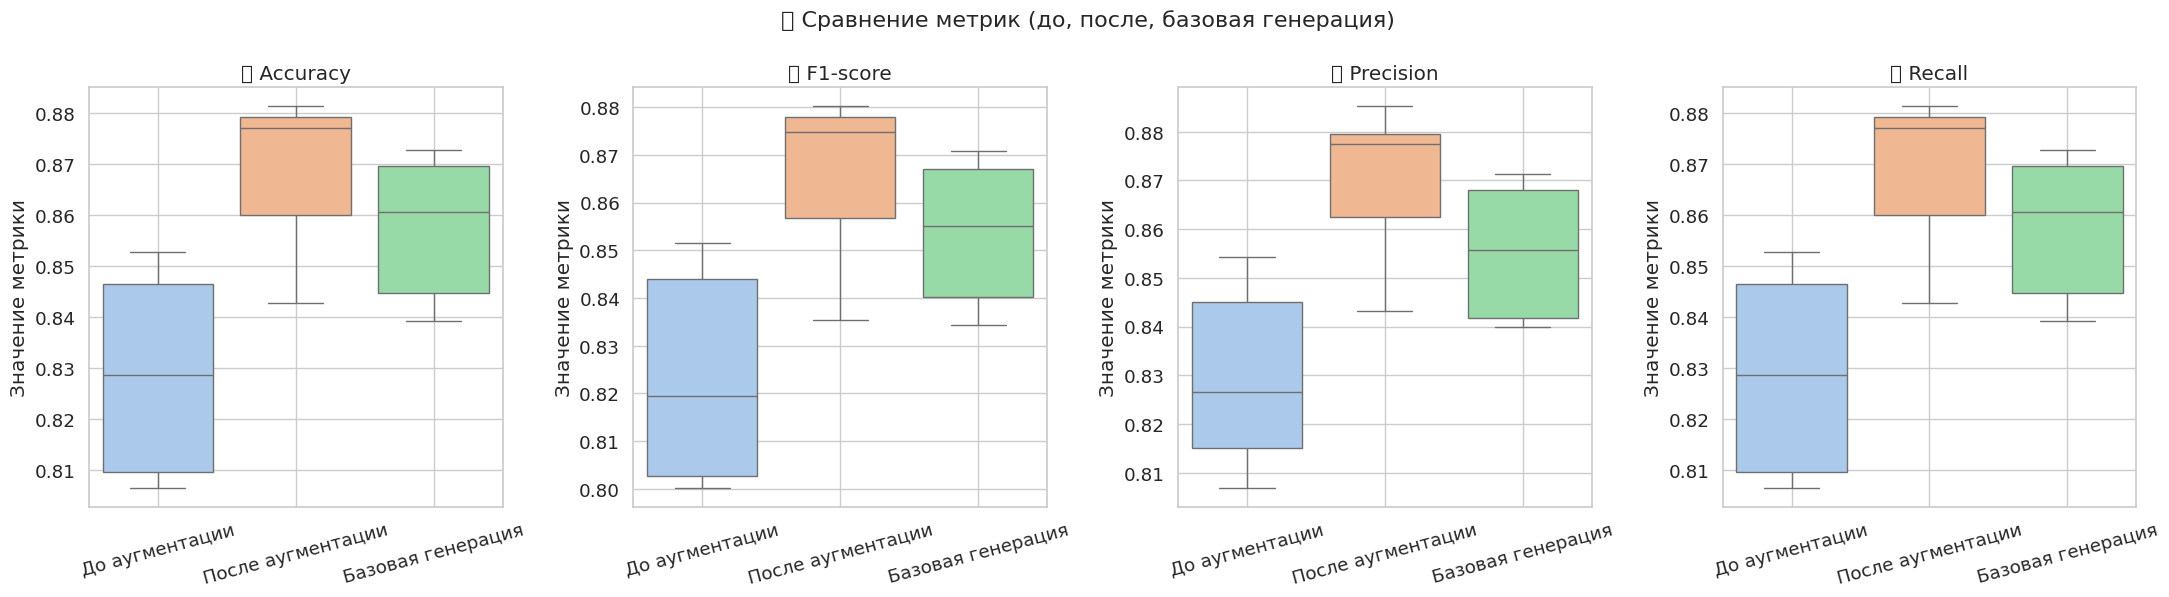

<ipython-input-77-9a9fd809a08c>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sizes, x="stage", y="size", palette="muted")
<ipython-input-77-9a9fd809a08c>:86: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


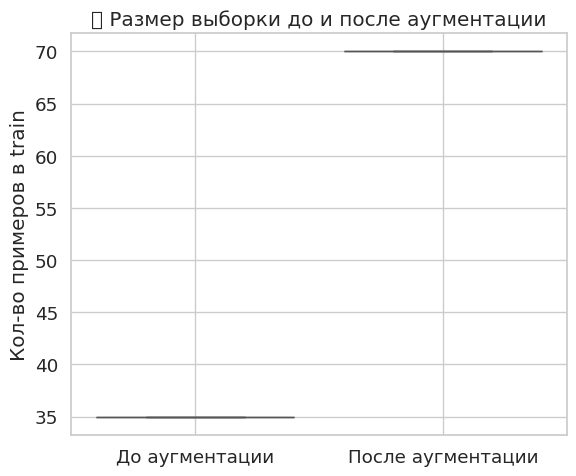

<ipython-input-77-9a9fd809a08c>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_class_balance, x="label", y="count", palette="coolwarm")
<ipython-input-77-9a9fd809a08c>:96: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


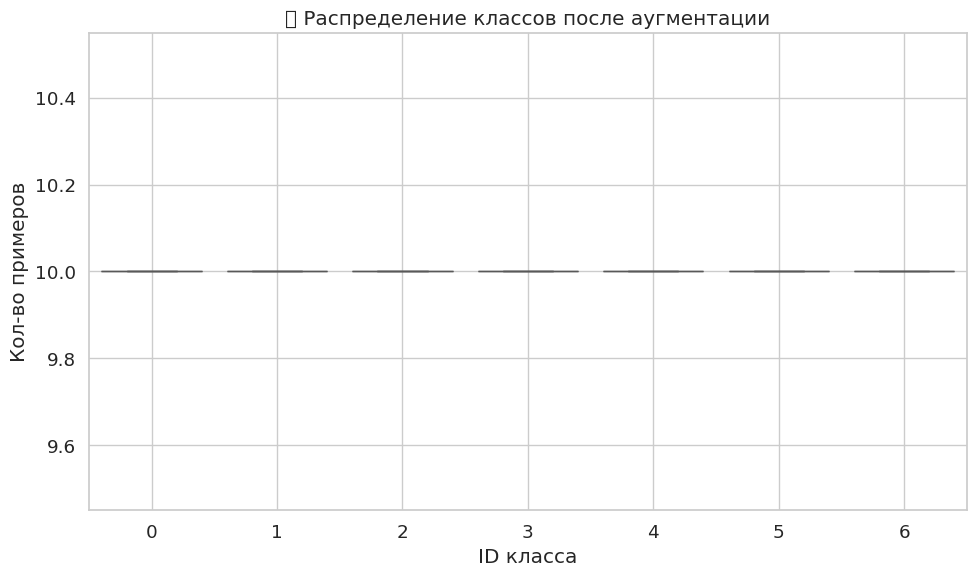

In [ ]:
generator_350 = Generator(
    base_url='http://193.187.173.33:8002/api/providers/openai/v1',
    model_name='gpt-3.5-turbo',
    max_tokens =350
)
first_crit_gen = AdversarialClassLevelGeneratorBase(generator_350)
run_and_plot_experiments(n_runs = 7, augmenter = first_crit_gen, dataset = snips, show_diff_fn = show_diff, gen=generator_350, base_scores=base_augment_snips_5_plus_5)

дальше думаем

e5-large

Новая идея с Эмбеддингами

In [ ]:
model = SentenceTransformer('intfloat/multilingual-e5-large')

modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/160k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

In [ ]:
!pip install xeger
!pip install Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 66.6 MB/s eta 0:00:00


In [ ]:
from xeger import Xeger
import Levenshtein

from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sentence_transformers import SentenceTransformer
from collections import defaultdict
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
class EnhancedReSynthesizerTemplate(BaseSynthesizerTemplate):
    _INTENT_NAME_LABEL = "Intent name"
    _EXAMPLE_UTTERANCES_LABEL = "Example utterances"
    _GENERATE_INSTRUCTION = (
        "Please generate {n_examples} regular expressions for this intent.\n"
        "The expressions should contain only meaningful words and phrases. "
        "Do NOT use character-level wildcards or patterns like [a-z], [A-Z], [0-9], etc. "
        "Instead, use actual lexical variations, synonyms, and paraphrases. "
        "Each expression must reflect natural language structure.\n"
        "The goal is to generate ~1000 diverse sentences in total across all expressions that comprehensively capture the intent.\n"
    )

    _MESSAGES_TEMPLATE: ClassVar[list[Message]] = [
        Message(
            role=Role.USER,
            content=(
                "You will be given a set of example utterances and an intent name. "
                "Your task is to generate regular expressions that match these utterances while capturing the intent's variations.\n\n"
                "Guidelines:\n"
                "- Do NOT use regex character sets like [a-z], [0-9], etc.\n"
                "- Only use words and phrases that are meaningful and derived from examples or inferred intent\n"
                "- Use parentheses to group options, and | to indicate alternatives\n"
                "- Include optional parts with (word|) when appropriate\n"
                "- Try to produce regexes that could together generate around 1000 natural sentence variations\n"
                "- Cover both concise and elaborate phrasings\n"
                "- Handle reordering of elements when it reflects real language use\n"
                "- Prioritize precision over exhaustiveness\n"
                "- If no examples are given, base patterns solely on intent name\n"
                "- If no intent name is provided, try to infer it from examples\n\n"
                "Intent name: add music\n\n"
                "Example utterances:\n"
                "1. add this artist to my Sinfonía Hipster\n"
                "2. I want to put Land of the Dead into my Big Daddy's Booze & Blues playlist\n"
                "3. Put a track by lil mama into my guest list sneaky zebra playlist\n"
                "4. add the tune by misato watanabe to the Trapeo playlist\n"
                "5. add this album to the playlist called dishwashing\n\n"
                "Please generate regular expressions for this intent."
            ),
        ),
        Message(
            role=Role.ASSISTANT,
            content=(
                "1. (add|put|insert) (this|the|a|) (artist|track|tune|album|song) (by|from|) (lil mama|misato watanabe|Land of the Dead|The New Timer|) (to|into|in) (my|the|) (Sinfonía Hipster|Big Daddy's Booze & Blues|guest list sneaky zebra|Trapeo|dishwashing|playlist)\n"
                "2. (I want to|I'd like to|please) (add|put|include) (a|the) (song|track|album) (by|from) (lil mama|misato watanabe) (into|to) (my|) (Trapeo|guest list sneaky zebra|playlist)\n"
                "3. (Add|Insert|Put) (this|that|the) (track|tune) (by|from) (misato watanabe|lil mama) (into|in|to) (my|the|) (playlist called|playlist named|playlist)\n"
                "4. (Please|Can you|Would you) (add|put) (this|the) (album|track) (into|to) (Sinfonía Hipster|dishwashing|playlist)\n"
                "5. (Put|Add) (Land of the Dead|The New Timer) (into|to) (Big Daddy's Booze & Blues|playlist)\n"
            ),
        ),
    ]
# shot = create_shot_dataframe(snips, n=5)
# p = EnhancedReSynthesizerTemplate(shot)
# for el in p(shot.intents[0], 10):
#   print(el['role'], el['content'])

In [ ]:
from typing import List, Dict
from collections import defaultdict
import re
import random
import numpy as np
from xeger import Xeger
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
from typing import List
import Levenshtein
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch
class EnhancedRegexGeneratorPrompt(UtteranceGenerator):
    def __init__(self, generator: Generator, model):
        self.generator = generator
        self.model = model
        self.xeger = Xeger()
        self.prompt_maker = EnhancedReSynthesizerTemplate
        self.perplexity_model = GPT2LMHeadModel.from_pretrained("gpt2")
        self.perplexity_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
        self.perplexity_model.eval()

    def _build_regex_prompt(self, examples: List[str], intent_name: str) -> Message:
        example_block = "\n".join(f"- {ex}" for ex in examples)
        return Message(
            role=Role.USER,
            content=(
                f"Create valid regex patterns for intent '{intent_name}'\n"
                f"Examples:\n{example_block}\n\n"
                f"Important:\n"
                f"- Only generate syntactically correct regex\n"
                f"- Avoid complex patterns that might cause errors\n"
                f"- Test your patterns before output\n"
                f"- Output numbered list"
            )
        )

    def _extract_valid_regexes(self, response: str, max_retries: int = 3) -> List[str]:
        lines = [line.strip() for line in response.strip().split("\n") if line.strip()]
        regexes = []

        for line in lines:
            if re.match(r"^\d+\.", line):
                try:
                    pattern = line.split(".", 1)[1].strip()
                    # Проверка валидности регулярного выражения
                    re.compile(pattern)
                    regexes.append(pattern)
                except re.error:
                    continue

        # Если не получили валидных регулярок, пробуем еще раз
        if not regexes and max_retries > 0:
            print("⚠ No valid regexes found, retrying...")
            return self._get_regexes_from_llm(max_retries - 1)

        return regexes

    def _get_regexes_from_llm(self, examples: List[str], intent_name: str, max_retries: int = 3) -> List[str]:
        if max_retries <= 0:
            return []

        prompt = self._build_regex_prompt(examples, intent_name)
        response = self.generator.get_chat_completion([prompt])
        return self._extract_valid_regexes(response, max_retries - 1)

    def _is_too_similar(self, new_utt, existing_utts, threshold=0.8):
        for utt in existing_utts:
            if Levenshtein.ratio(new_utt.lower(), utt.lower()) > threshold:
                return True
        return False
    def _generate_from_regex(self, regexes: List[str], n_per_regex: int = 50) -> List[str]:
        utterances = []
        for regex in regexes:
            try:
                for _ in range(n_per_regex):
                    try:
                        utterance = self.xeger.xeger(regex)
                        utterances.append(utterance)
                    except:
                        continue
            except:
                continue

        if not utterances:
            return []

        filtered = []
        for utt in utterances:
            if not any(Levenshtein.ratio(utt.lower(), exist.lower()) > 0.85
                    for exist in filtered):
                filtered.append(utt)

        return filtered

    def _cluster_utterances(self, texts: List[str], n_clusters: int) -> List[str]:
        if not texts:
            return []

        embeddings = self.model.encode(texts, convert_to_tensor=True)
        kmeans = KMeans(n_clusters=min(n_clusters, len(texts)), random_state=42)
        clusters = kmeans.fit_predict(embeddings.cpu().numpy())

        clustered_texts = defaultdict(list)
        for idx, label in enumerate(clusters):
            clustered_texts[label].append(texts[idx])

        selected = []
        for cluster_id, group in clustered_texts.items():
            if not group:
                continue

            # Compute perplexities
            scored = [(utt, self._perplexity(utt)) for utt in group]
            # Sort by descending perplexity — choose most "unusual" one
            scored.sort(key=lambda x: x[1], reverse=True)
            selected.append(scored[0][0])

        return selected
    def _perplexity(self, text: str) -> float:
        encodings = self.perplexity_tokenizer(text, return_tensors='pt')
        input_ids = encodings.input_ids
        with torch.no_grad():
            outputs = self.perplexity_model(input_ids, labels=input_ids)
        loss = outputs.loss
        return torch.exp(loss).item()


    def generate(self, dataset: Dataset, split_name: str = Split.TRAIN,
                n_final_per_class: int = 3, update_split: bool = True) -> List[Sample]:
        original_split = dataset[split_name]
        id_to_name = {intent.id: intent.name for intent in dataset.intents}
        utterances_by_intent = defaultdict(list)

        for sample in original_split:
            utterances_by_intent[sample["label"]].append(sample["utterance"])

        new_samples = []
        augmenter = UtteranceGenerator(self.generator, prompt_maker=self.prompt_maker(dataset))
        data_exp = augmenter.augment(dataset, n_generations=30, update_split=False)
        exp_by_intent = defaultdict(list)

        for sample in data_exp:
            exp_by_intent[sample.label].append(sample.utterance)

        for intent_id, examples in utterances_by_intent.items():
            intent_name = id_to_name[intent_id]
            print(f"\n🔹 Processing intent: {intent_name} (id={intent_id})")

            # Получаем валидные регулярки (с повторными попытками)
            # regexes = self._get_regexes_from_llm(exp_by_intent[intent_id], intent_name)

            # if not regexes:
                # print(f"⚠ Could not generate valid regexes for {intent_name}, skipping")
                # continue

            # Генерация и кластеризация
            generated = self._generate_from_regex(exp_by_intent[intent_id], n_per_regex=200)
            selected = self._cluster_utterances(generated, n_clusters=n_final_per_class)

            for utterance in selected:
                new_samples.append({
                    Dataset.label_feature: intent_id,
                    Dataset.utterance_feature: utterance
                })

        if update_split and new_samples:
            generated_split = HFDataset.from_list(new_samples)
            dataset[split_name] = concatenate_datasets([original_split, generated_split])

        return [Sample(**sample) for sample in new_samples]

In [ ]:
model = SentenceTransformer('intfloat/multilingual-e5-large-instruct')

In [ ]:
from autointent import Dataset
generator = Generator(
    base_url='http://193.187.173.33:8002/api/providers/openai/v1',
    model_name='gpt-3.5-turbo',
    max_tokens=500
)
regex_generator = EnhancedRegexGeneratorPrompt(generator=generator, model=model)
run_and_plot_experiments(n_runs = 7, augmenter = regex_generator, dataset = snips, show_diff_fn = show_diff, gen=generator, base_scores=base_augment_snips_5_plus_5, title="EnhancedRegexGeneratorPrompt")

In [ ]:
from collections import defaultdict
import random
import re

from datasets import concatenate_datasets
from xeger import Xeger
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

from autointent.generation.chat_templates._evolution_templates_schemas import Message, Role
from autointent.generation.chat_templates._base_synthesizer import BaseSynthesizerTemplate

class AdvancedXegerSampler(UtteranceGenerator):

    def __init__(self, generator: Generator, model: SentenceTransformer):
        self.generator = generator
        self.model = model

    def _build_semantic_prompt(self, examples: list[str], intent_name: str) -> Message:
        example_block = "\n".join(f"- {ex}" for ex in examples)
        return Message(
            role=Role.USER,
            content=(
                f"You are a data generation assistant. Your task is to create exactly 15 new user utterances "
                f"for the intent: '{intent_name}'.\n\n"
                f"Below are some examples:\n{example_block}\n\n"
                f"Generate 15 new, diverse utterances that preserve the same intent. "
                f"Do not copy. Make them sound like from different people.\n"
                f"Use greetings, questions, names, locations. Output only the list."
            )
        )

    def _extract_numbered_list(self, response: str) -> list[str]:
        lines = response.strip().split("\n")
        return [re.match(r"^\s*\d+\.\s*(.+)$", line).group(1).strip() for line in lines if re.match(r"^\s*\d+\.\s*(.+)$", line)]

    def _build_regex_prompt(self, examples: list[str], intent_name: str) -> Message:
        example_block = "\n".join(f"- {ex}" for ex in examples)
        return Message(
            role=Role.USER,
            content=(
                f"You are a regex expert. Generate 10 diverse regexes for the intent: '{intent_name}'.\n"
                f"Examples:\n{example_block}\n\n"
                f"Rules:\n"
                f"- Each regex must cover a different phrasing.\n"
                f"- Avoid near duplicates.\n"
                f"- Output 10 lines only, numbered."
            )
        )

    def _extract_regexes(self, response: str) -> list[str]:
        lines = response.strip().split("\n")
        return [re.match(r"^\s*\d+\.\s*(.+)$", line).group(1).strip() for line in lines if re.match(r"^\s*\d+\.\s*(.+)$", line)]

    def _generate_sentences(self, regexes: list[str], n_per_regex: int = 100) -> list[str]:
        x = Xeger()
        sentences = []
        for regex in regexes:
            try:
                sentences.extend([x.xeger(regex) for _ in range(n_per_regex)])
            except Exception as e:
                print(f"⚠️ Failed regex: {regex}\n{e}")
        return list(set(sentences))

    def _select_diverse(self, texts: list[str], num_clusters: int) -> list[str]:
        embeddings = self.model.encode(texts, convert_to_tensor=True)
        kmeans = KMeans(n_clusters=num_clusters, random_state=1303)
        labels = kmeans.fit_predict(embeddings.cpu().numpy())
        centroids = kmeans.cluster_centers_
        sims = cosine_similarity(centroids, embeddings.cpu().numpy())
        indices = sims.argmax(axis=1)
        return [texts[i] for i in indices]

    def _expand_class(self, intent: str, examples: list[str], n_clusters: int) -> list[str]:
        sem_prompt = self._build_semantic_prompt(examples, intent)
        sem_resp = self.generator.get_chat_completion([sem_prompt])
        sem_examples = self._extract_numbered_list(sem_resp)

        regex_prompt = self._build_regex_prompt(sem_examples, intent)
        regex_resp = self.generator.get_chat_completion([regex_prompt])
        regexes = self._extract_regexes(regex_resp)

        print(f"📌 {intent} - Regexes: {regexes}")

        generated = self._generate_sentences(regexes)
        print(f"🎯 {intent} - Generated {len(generated)} samples")

        selected = self._select_diverse(texts=generated, num_clusters=n_clusters)
        print(f"✅ {intent} - Selected {len(selected)} samples")
        return selected

    def generate(self, dataset: Dataset, split_name: str = Split.TRAIN, n_final_per_class: int = 3, update_split: bool = True) -> list[Sample]:
        original_split = dataset[split_name]
        id_to_name = {intent.id: intent.name for intent in dataset.intents}
        utterances_by_intent = defaultdict(list)

        for sample in original_split:
            utterances_by_intent[sample["label"]].append(sample["utterance"])

        new_samples = []

        for intent_id, examples in utterances_by_intent.items():
            intent_name = id_to_name[intent_id]
            few_shots = random.sample(examples, min(5, len(examples)))
            print(f"\n🔹 Generating for intent: {intent_name} (id={intent_id})")

            gen_utts = self._expand_class(intent_name, few_shots, n_clusters=n_final_per_class)

            for utt in gen_utts:
                new_samples.append({
                    Dataset.label_feature: intent_id,
                    Dataset.utterance_feature: utt
                })

        if update_split and new_samples:
            generated_split = HFDataset.from_list(new_samples)
            dataset[split_name] = concatenate_datasets([original_split, generated_split])

        return new_samples


In [ ]:
my_gen = Generator(
    base_url='http://193.187.173.33:8002/api/providers/openai/v1',
    model_name='gpt-3.5-turbo',
    max_tokens = 750
)
regex_generator = AdvancedXegerSampler(generator=my_gen, model=model)
title = "AdvancedXegerSampler"
run_and_plot_experiments(n_runs = 7, augmenter = regex_generator, dataset = snips, show_diff_fn = show_diff, gen=my_gen, base_scores=base_augment_snips_5_plus_5, new_elems=5, title=title)

In [ ]:
from xeger import Xeger
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sentence_transformers import SentenceTransformer
from autointent.generation.chat_templates._evolution_templates_schemas import Message, Role

from typing import ClassVar

from autointent.generation.chat_templates._base_synthesizer import BaseSynthesizerTemplate
class ReSynthesizerTemplate(BaseSynthesizerTemplate):

    _INTENT_NAME_LABEL = "Название интента"
    _EXAMPLE_UTTERANCES_LABEL = "Примеры высказываний"
    _GENERATE_INSTRUCTION = "Пожалуйста, сгенерируй {n_examples} регулярных выражений для этого интента.\n"

    _MESSAGES_TEMPLATE: ClassVar[list[Message]] = [
        Message(
            role=Role.USER,
            content=(
                "Вам будет предоставлен набор примеров высказываний и название общей темы (интент). "
                "Ваша задача - сгенерировать регулярные выражения, соответствующие этому интенту.\n\n"
                "Правила:\n"
                "- Регулярное выражение представляет собой последовательность скобок через пробел\n"
                "- В каждой скобке через символ | перечислены возможные слова, которые можно подставить на это место\n"
                "- Если название интента отсутствует, определите его из примеров\n"
                "- Если примеры отсутствуют, используйте только название интента\n"
                "{extra_instructions}\n\n"
                "Название интента: add the music\n\n"
                "Примеры высказываний:\n"
                "1. add this artist to my Sinfonía Hipster\n"
                "2. I want to put Land of the Dead into my Big Daddy's Booze & Blues playlist\n"
                "3. Put a track by lil mama into my guest list sneaky zebra playlist.\n\n"
                "4. add the tune by misato watanabe to the Trapeo playlist\n\n"
                "5. add this album to the playlist called dishwashing\n\n"
                "Пожалуйста, сгенерируй регулярное выражение для этого интента."
            ),
        ),
        Message(
            role=Role.ASSISTANT,
            content=(
                "1. (I|) (want to|need to) (add|put) (this|those|that) (artist|Land of the Dead|a track|music|album) (to|into|on|in|) (my||this|that) (playlist|list|Sinfonía Hipster) (please|)\n"
            ),
        ),
        Message(
            role=Role.USER,
            content=(
                "Название интента: booking\n\n"
                "Примеры высказываний:\n"
                "1. Book a restaurant with a spa in Connecticut\n\n"
                "2. I would like a restaurant reservation for this year for 4 people.\n\n"
                "3. I need a table in one hour from now at somewhere not far from LA\n\n"
                "4. book The Fry Bread House for seven in Olive\n\n"
                "5. Book the Gus Stevens Seafood Restaurant & Buccaneer Lounge in Papua New Guinea for one person.\n\n"
                "Пожалуйста, сгенерируй регулярное выражение для этого интента."
            ),
        ),
        Message(
            role=Role.ASSISTANT,
            content=("1. (Please|) (at two am|) (I|) (need|would like|want|'d like|) (a reservation|book|eat|reserve) (me|) (a|the|) (restaurant|hotel|splot|breakfasteggo serving brasserie) (for ten|for this year|at 9 pm|at two am|at six am|) (for 4 people|for four people|for a party of seven|)"),
        ),
        Message(
            role=Role.USER,
            content=(
                "Название интента: Play a music\n\n"
                "Примеры высказываний:\n"
                "1. I want to hear some psychedelic rock\n\n"
                "2. I want to hear something from Post-punk Revival\n\n"
                "3. Play some music from 1995\n\n"
                "4. I wish to listen to some instrumental music.\n\n"
                "5. play The New Timer by Augustus Pablo with Itunes\n\n"
                "Пожалуйста, сгенерируй регулярное выражение для этого интента."
            ),
        ),
        Message(
            role=Role.ASSISTANT,
            content=("1. (Please|) (I want|I need|I wish|) (to|) (play|hear|listen to) (a|the|) (Play some music from 1995|wendy james|from 2000 on spotify|music on Lastfm)"),
        ),
        Message(
            role=Role.USER,
            content=(
                "Название интента: weather\n\n"
                "Примеры высказываний:\n\n"
                "1. Tell me the weather forecast for Douglas State Forest\n\n"
                "2. What will the weather be in Bernie ID ?\n\n"
                "3. How hot will it be in Wisconsin on august fourth?\n\n"
                "4. Is it freezing on Jun. the 21st in Apshawa South Africa?\n\n"
                "5. Will the weather in Falcon Heights call for rain?\n\n"
                "Пожалуйста, сгенерируй регулярное выражение для этого интента."
            ),
        ),
        Message(
            role=Role.ASSISTANT,
            content=(
                "1. (Tell me|Say|) (What|Is it) (will|) (a|the) (freezing|weather|weather forecast) (for|be|in) (Douglas State Forest|Bernie ID|in Wisconsin|) (on august fourth|on dec. 26, 2027|twenty-fourth, 2028|) (/?|)\n"
            ),
        ),
    ]
class ReSynthesizerTemplateEn(BaseSynthesizerTemplate):

    _INTENT_NAME_LABEL = "Intent Name"
    _EXAMPLE_UTTERANCES_LABEL = "Example Utterances"
    _GENERATE_INSTRUCTION = "Please generate {n_examples} regular expressions for this intent.\n"

    _MESSAGES_TEMPLATE: ClassVar[list[Message]] = [
        Message(
            role=Role.USER,
            content=(
                "You will be given a set of example utterances and the name of a general theme (intent). "
                "Your task is to generate regular expressions that match this intent.\n\n"
                "Rules:\n"
                "- A regular expression should be a sequence of parentheses separated by spaces\n"
                "- Each parenthesis contains alternative words separated by the '|' symbol that can fit in that position\n"
                "- If the intent name is missing, infer it from the examples\n"
                "- If the examples are missing, use only the intent name\n"
                "{extra_instructions}\n\n"
                "Intent Name: add the music\n\n"
                "Example Utterances:\n"
                "1. add this artist to my Sinfonía Hipster\n"
                "2. I want to put Land of the Dead into my Big Daddy's Booze & Blues playlist\n"
                "3. Put a track by lil mama into my guest list sneaky zebra playlist.\n"
                "4. add the tune by misato watanabe to the Trapeo playlist\n"
                "5. add this album to the playlist called dishwashing\n\n"
                "Please generate a regular expression for this intent."
            ),
        ),
        Message(
            role=Role.ASSISTANT,
            content=(
                "1. (I|) (want to|need to) (add|put) (this|those|that) (artist|Land of the Dead|a track|music|album) (to|into|on|in|) (my||this|that) (playlist|list|Sinfonía Hipster) (please|)\n"
            ),
        ),
        Message(
            role=Role.USER,
            content=(
                "Intent Name: booking\n\n"
                "Example Utterances:\n"
                "1. Book a restaurant with a spa in Connecticut\n"
                "2. I would like a restaurant reservation for this year for 4 people.\n"
                "3. I need a table in one hour from now at somewhere not far from LA\n"
                "4. book The Fry Bread House for seven in Olive\n"
                "5. Book the Gus Stevens Seafood Restaurant & Buccaneer Lounge in Papua New Guinea for one person.\n\n"
                "Please generate a regular expression for this intent."
            ),
        ),
        Message(
            role=Role.ASSISTANT,
            content=("1. (Please|) (at two am|) (I|) (need|would like|want|'d like|) (a reservation|book|eat|reserve) (me|) (a|the|) (restaurant|hotel|spot|breakfast brasserie) (for ten|for this year|at 9 pm|at two am|at six am|) (for 4 people|for four people|for a party of seven|)"),
        ),
        Message(
            role=Role.USER,
            content=(
                "Intent Name: Play a music\n\n"
                "Example Utterances:\n"
                "1. I want to hear some psychedelic rock\n"
                "2. I want to hear something from Post-punk Revival\n"
                "3. Play some music from 1995\n"
                "4. I wish to listen to some instrumental music.\n"
                "5. play The New Timer by Augustus Pablo with Itunes\n\n"
                "Please generate a regular expression for this intent."
            ),
        ),
        Message(
            role=Role.ASSISTANT,
            content=("1. (Please|) (I want|I need|I wish|) (to|) (play|hear|listen to) (a|the|) (Play some music from 1995|wendy james|from 2000 on spotify|music on Lastfm)"),
        ),
        Message(
            role=Role.USER,
            content=(
                "Intent Name: weather\n\n"
                "Example Utterances:\n"
                "1. Tell me the weather forecast for Douglas State Forest\n"
                "2. What will the weather be in Bernie ID?\n"
                "3. How hot will it be in Wisconsin on August fourth?\n"
                "4. Is it freezing on June 21st in Apshawa, South Africa?\n"
                "5. Will the weather in Falcon Heights call for rain?\n\n"
                "Please generate a regular expression for this intent."
            ),
        ),
        Message(
            role=Role.ASSISTANT,
            content=(
                "1. (Tell me|Say|) (What|Is it) (will|) (a|the) (freezing|weather|weather forecast) (for|be|in) (Douglas State Forest|Bernie ID|in Wisconsin|) (on August fourth|on Dec. 26, 2027|twenty-fourth, 2028|) (/?|)\n"
            ),
        ),
    ]
class ReSynthesizerTemplateEn2(BaseSynthesizerTemplate):

    _INTENT_NAME_LABEL = "Intent Name"
    _EXAMPLE_UTTERANCES_LABEL = "Example Utterances"
    _GENERATE_INSTRUCTION = (
        "Please generate {n_examples} regular expressions for this intent.\n"
        "Your goal is to cover the **full semantic space** of the intent.\n"
        "This means including diverse ways people might phrase their intent using different vocabulary, syntax, tone, and structure.\n"
        "Include commands, questions, requests, polite forms, slang, and different sentence orders.\n"
        "Avoid overly similar patterns.\n"
        "Try to be *creative but realistic*.\n"
        "Each regex should match one unique phrasing group."
    )

    _MESSAGES_TEMPLATE: ClassVar[list[Message]] = [
        Message(
            role=Role.USER,
            content=(
                "You are a data generation assistant skilled in regular expressions.\n"
                "You will be given a user intent and some example utterances.\n"
                "Generate diverse regular expressions that match **various possible phrasings** of this intent.\n\n"
                "Guidelines:\n"
                "- Your regex must be composed of parenthesized groups separated by spaces.\n"
                "- Each group contains alternative words or phrases separated by '|'.\n"
                "- Each expression must be unique and semantically distinct from the others.\n"
                "- Cover both common and edge-case formulations.\n"
                "- Include variations in tone (command, polite, slang, etc.)\n"
                "- Do not simply reword the same thing slightly — semantic range is key.\n"
                "{extra_instructions}\n\n"
                "Intent Name: order food\n\n"
                "Example Utterances:\n"
                "1. I want to order sushi tonight\n"
                "2. Can I get a pizza for lunch?\n"
                "3. Order two tacos with extra guacamole\n"
                "4. I'd like to place an order for dinner\n"
                "5. Gimme some fried rice\n\n"
                "Please generate diverse regular expressions that match this intent."
            ),
        ),
        Message(
            role=Role.ASSISTANT,
            content=(
                "1. (I want|I'd like|I need|Can I|get me|Gimme) (to|) (order|get|have) (a|some|) (pizza|sushi|tacos|fried rice|food) (tonight|for dinner|for lunch|now|ASAP)\n"
                "2. (Please|Hey|Yo|) (order|bring|get) (me|) (a|some|) (burger|wings|Chinese|dinner|food) (with|plus|and) (extra sauce|no onions|fries|coke)\n"
                "3. (I|) (want|would like|need|plan) (to|to just) (place|make) (an order|a food order|a dinner request)\n"
                "4. (Can I|get me|I need|I’ll take|Let’s get) (tacos|pad thai|pizza|hotdogs) (for|at|by) (noon|eight|tonight|dinner|lunchtime)\n"
                "5. (Can you|Would you|Please) (put in|set up|arrange) (a|my) (order|meal|food request) (now|soon|ASAP|for 6 PM)"
            ),
        ),
    ]




🔁 Запуск 1 из 7

🔹 Processing intent: AddToPlaylist (id=0)
⚠️ Failed on regex: (Add|Put|Insert|Include) (a|the) (song|track|music) by (Don and Sherri|United Abominations|misato watanabe|this artist|heresy and the hotel choir) (to|into|on|in) (my|the) playlist called (Meditate
missing ), unterminated subpattern at position 188

🔹 Processing intent: BookRestaurant (id=1)

🔹 Processing intent: GetWeather (id=2)

🔹 Processing intent: PlayMusic (id=3)

🔹 Processing intent: RateBook (id=4)

🔹 Processing intent: SearchCreativeWork (id=5)

🔹 Processing intent: SearchScreeningEvent (id=6)
⚠️ Failed on regex: (Is|When is) (Hollows Grove|movies) (playing|scheduled|showing) (at|in) (any movie theatre|AMC Theaters|around here) (at|for) (ten pm|
missing ), unterminated subpattern at position 126
Few-shot: {'ac': 0.8564285714285714, 'f1': 0.8578317458808761, 'pre': 0.8646901011229228, 'recall': 0.8564285714285715}
augmentation: {'ac': 0.8235714285714286, 'f1': 0.819333189301333, 'pre': 0.82238626159

<ipython-input-14-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="stage", y="value", ax=ax, palette="pastel")
<ipython-input-14-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="stage", y="value", ax=ax, palette="pastel")
<ipython-input-14-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="stage", y="value", ax=ax, palette="pastel")
<ipython-input-14-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

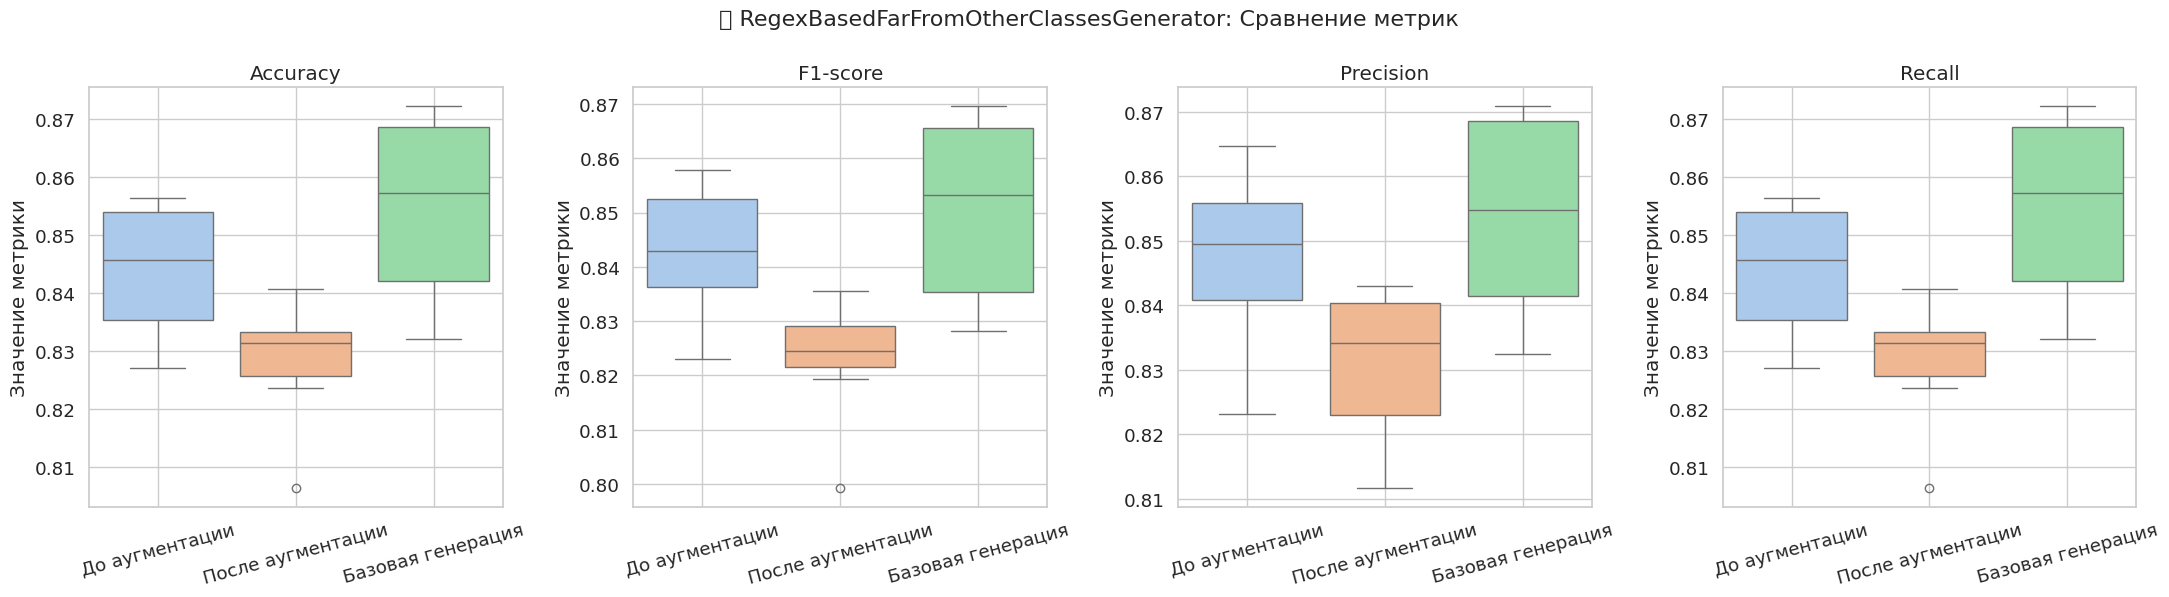

<ipython-input-14-5313fb8f192f>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sizes, x="stage", y="size", palette="muted")
<ipython-input-14-5313fb8f192f>:84: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


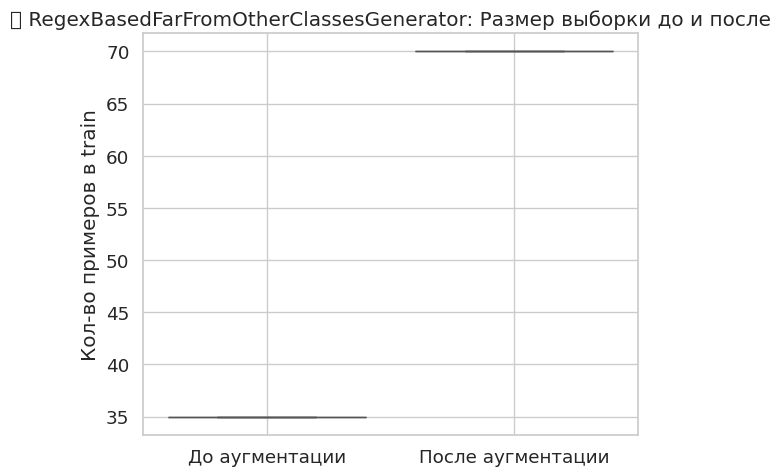

<ipython-input-14-5313fb8f192f>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_class_balance, x="label", y="count", palette="coolwarm")
<ipython-input-14-5313fb8f192f>:95: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


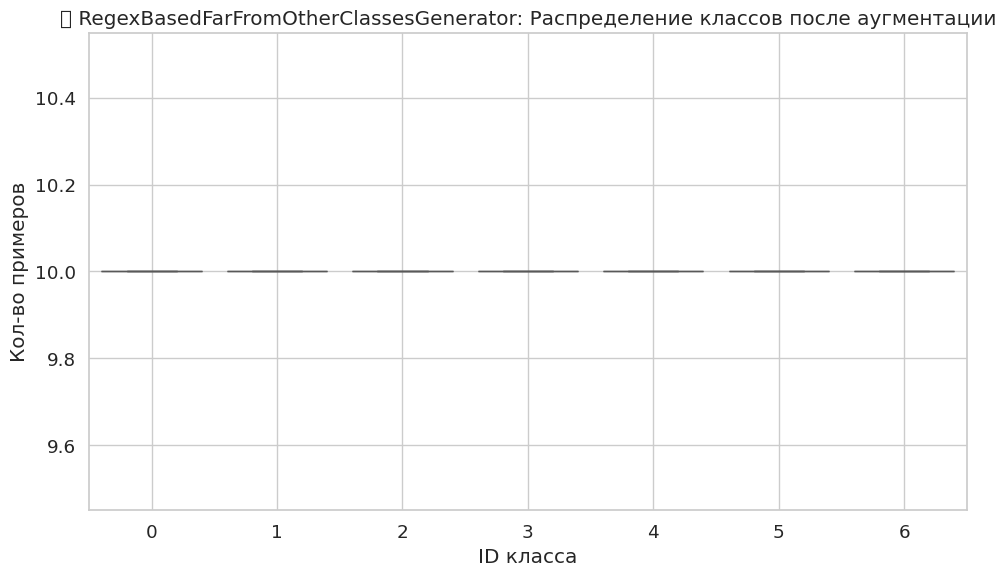

In [ ]:
my_gen = Generator(
    base_url='http://193.187.173.33:8002/api/providers/openai/v1',
    model_name='gpt-3.5-turbo',
    max_tokens = 500
)
regex_generator = RegexBasedFarFromOtherClassesGenerator(generator=my_gen, model=model, template=ReSynthesizerTemplateEn)
title = "RegexBasedClassLevelGeneratorFar"
run_and_plot_experiments(n_runs = 7, augmenter = regex_generator, dataset = snips, show_diff_fn = show_diff, gen=my_gen, base_scores=base_augment_snips_5_plus_5, new_elems=5, title=title)

In [ ]:
my_gen = Generator(
    base_url='http://193.187.173.33:8002/api/providers/openai/v1',
    model_name='gpt-3.5-turbo',
    max_tokens = 500
)
regex_generator = RegexBasedClassLevelGenerator(generator=my_gen, model=model, template=ReSynthesizerTemplateEn)
title = "RegexBasedClassLevelGenerator"
run_and_plot_experiments(n_runs = 7, augmenter = regex_generator, dataset = snips, show_diff_fn = show_diff, gen=my_gen, base_scores=base_augment_snips_5_plus_5, new_elems=5, title=title)


🔁 Запуск 1 из 7


KeyboardInterrupt: 

In [ ]:
import re
import random
from collections import defaultdict
from typing import List, Dict
from xeger import Xeger
import Levenshtein
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
from datasets import Dataset, concatenate_datasets

class RegexBasedGenerator(UtteranceGenerator):
    def __init__(self, generator: Generator, model, nums_reg=5, nums_for_reg=50):
        self.generator = generator
        self.model = model
        self.nums_reg = nums_reg
        self.nums_for_reg = nums_for_reg
        self.xeger = Xeger()

    def _build_semantic_prompt(self, examples: List[str], intent_name: str) -> Message:
        example_block = "\n".join(f"- {ex}" for ex in examples)
        return Message(
            role=Role.USER,
            content=(
                f"Generate exactly 15 diverse user utterances for intent: '{intent_name}'\n"
                f"Examples:\n{example_block}\n\n"
                f"Rules:\n"
                f"- Create completely new variations\n"
                f"- Include different phrasing styles (questions, commands, etc.)\n"
                f"- Add greetings, polite forms, and natural variations\n"
                f"- Output exactly 15 numbered items\n"
                f"- No explanations"
            )
        )

    def _build_regex_prompt(self, examples: List[str], intent_name: str) -> Message:
        example_block = "\n".join(f"- {ex}" for ex in examples)
        return Message(
            role=Role.USER,
            content=(
                f"Create 10 diverse regex patterns for intent: '{intent_name}'\n"
                f"Based on:\n{example_block}\n\n"
                f"Constraints:\n"
                f"- Use semantic placeholders like (GENRE), (ARTIST)\n"
                f"- Include optional greetings/polite forms\n"
                f"- Cover different phrasing styles\n"
                f"- Each should generate 50+ variants\n"
                f"- Output numbered regexes only"
            )
        )

    def _extract_numbered_list(self, response: str) -> List[str]:
        return [
            re.split(r"^\d+\.\s*", line, maxsplit=1)[1].strip()
            for line in response.strip().split("\n")
            if re.match(r"^\d+\.", line)
        ]

    def _generate_from_regex(self, regexes: List[str], n_per_regex: int = 50) -> List[str]:
        utterances = []
        for regex in regexes:
            try:
                utterances.extend([self.xeger.xeger(regex) for _ in range(n_per_regex)])
            except Exception as e:
                print(f"Regex error: {regex} - {str(e)}")
        return list(set(utterances))

    def _cluster_utterances(self, texts: List[str], n_clusters: int) -> List[str]:
        embeddings = self.model.encode(texts, convert_to_tensor=True)
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(embeddings.cpu().numpy())

        centroids = kmeans.cluster_centers_
        sim_matrix = cosine_similarity(centroids, embeddings.cpu().numpy())
        closest_indices = sim_matrix.argmax(axis=1)

        return [texts[i] for i in closest_indices]
    def _cluster_utterances_far(self, texts: List[str], n_clusters: int) -> List[str]:
        embeddings = self.model.encode(texts, convert_to_tensor=True)
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(embeddings.cpu().numpy())

        centroids = kmeans.cluster_centers_
        all_embeddings = embeddings.cpu().numpy()

        result = []

        for cluster_id in range(n_clusters):
            cluster_indices = [i for i, c in enumerate(clusters) if c == cluster_id]
            cluster_vecs = all_embeddings[cluster_indices]
            centroid = centroids[cluster_id]

            distances = 1 - cosine_similarity([centroid], cluster_vecs)[0]

            sorted_idx = np.argsort(distances)
            percentile_80 = int(len(sorted_idx) * 0.8)
            percentile_90 = int(len(sorted_idx) * 0.9)
            if percentile_80 == percentile_90:
                chosen_idx = sorted_idx[percentile_80]
            else:
                chosen_idx = random.choice(sorted_idx[percentile_80:percentile_90])

            result.append(texts[cluster_indices[chosen_idx]])

        return result

    def _filter_similar(self, utterances: List[str], threshold: float = 0.9) -> List[str]:
        filtered = []
        for utt in utterances:
            if not any(Levenshtein.ratio(utt.lower(), f.lower()) >= threshold
                     for f in filtered):
                filtered.append(utt)
        return filtered

    def generate(self, dataset: Dataset, split_name: str = Split.TRAIN,
                n_final_per_class: int = 3, update_split: bool = True) -> List[Sample]:
        original_split = dataset[split_name]
        id_to_name = {intent.id: intent.name for intent in dataset.intents}
        utterances_by_intent = defaultdict(list)

        for sample in original_split:
            utterances_by_intent[sample["label"]].append(sample["utterance"])

        new_samples = []

        for intent_id, examples in utterances_by_intent.items():
            intent_name = id_to_name[intent_id]
            few_shots = random.sample(examples, min(5, len(examples)))

            semantic_prompt = self._build_semantic_prompt(few_shots, intent_name)
            semantic_response = self.generator.get_chat_completion([semantic_prompt])
            semantic_examples = self._extract_numbered_list(semantic_response)

            regex_prompt = self._build_regex_prompt(semantic_examples, intent_name)
            regex_response = self.generator.get_chat_completion([regex_prompt])
            regexes = self._extract_numbered_list(regex_response)

            generated = self._generate_from_regex(regexes, n_per_regex=50)
            generated = self._filter_similar(generated)

            selected = self._cluster_utterances_far(generated, n_clusters=n_final_per_class)

            for utterance in selected:
                new_samples.append({
                    Dataset.label_feature: intent_id,
                    Dataset.utterance_feature: utterance
                })

        if update_split and new_samples:
            generated_split = HFDataset.from_list(new_samples)
            dataset[split_name] = concatenate_datasets([original_split, generated_split])

a        return [Sample(**sample) for sample in new_samples]

In [ ]:
from autointent import Dataset
my_gen = Generator(base_url='http://193.187.173.33:8002/api/providers/openai/v1', model_name='gpt-3.5-turbo', max_tokens = 500)
regex_generator = RegexBasedGenerator(generator=my_gen, model=model)
title = "RegexBasedGeneratorFar"
run_and_plot_experiments(n_runs = 7, augmenter = regex_generator, dataset = snips, show_diff_fn = show_diff, gen=my_gen, base_scores=base_augment_snips_5_plus_5, new_elems=5, title=title)


🔁 Запуск 1 из 7


KeyboardInterrupt: 


🔁 Запуск 1 из 7
Regex error: ^(Please)? (add|include|put) "(.*)" by (ARTIST) in my (Ultimate Classics|Top Hits of the - missing ), unterminated subpattern at position 54
Regex error: (Will it be|Can you let me know) (cold|windy) in (Tokyo|Sydney|London|Miami|Paris|New York - missing ), unterminated subpattern at position 49
Regex error: Give (The Girl on the Train|The Great Gatsby|War and Peace|To Kill a Mockingbird|Pride and Prejudice|The Catcher in the Rye|The Hunger Games trilogy|The - missing ), unterminated subpattern at position 5
Regex error: I'm looking for the schedule of (The Shawsh - missing ), unterminated subpattern at position 32
Few-shot: {'ac': 0.8292857142857143, 'f1': 0.8289202910250054, 'pre': 0.831438515842766, 'recall': 0.8292857142857144}
augmentation: {'ac': 0.8592857142857143, 'f1': 0.8565854401811691, 'pre': 0.8610427621921659, 'recall': 0.8592857142857143}

🔁 Запуск 2 из 7
Regex error: ^(Hey there|Can you - missing ), unterminated subpattern at position 1
Reg

<ipython-input-78-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="stage", y="value", ax=ax, palette="pastel")
<ipython-input-78-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="stage", y="value", ax=ax, palette="pastel")
<ipython-input-78-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="stage", y="value", ax=ax, palette="pastel")
<ipython-input-78-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

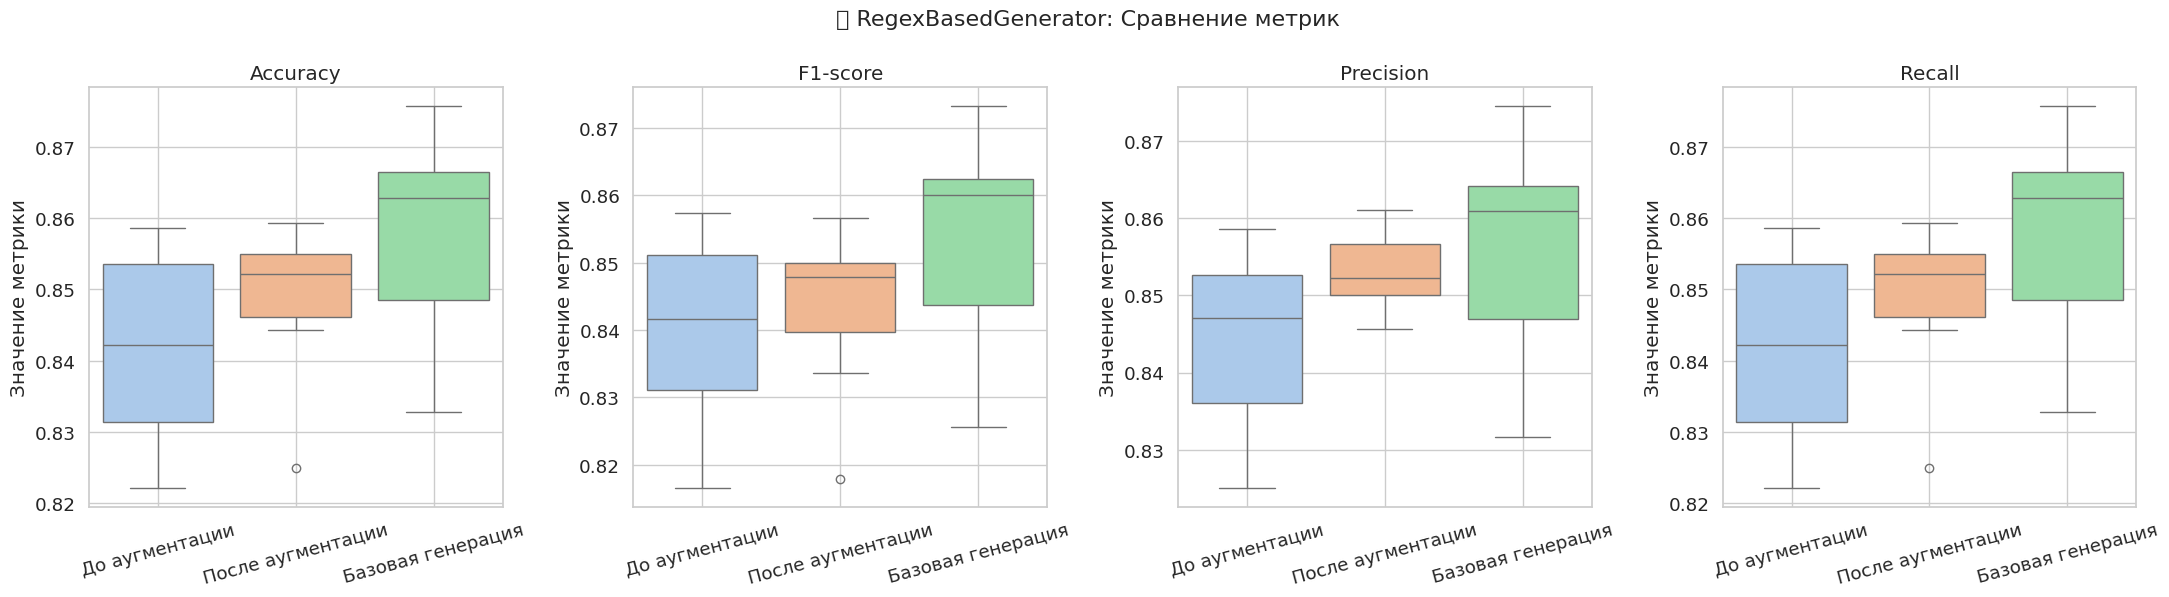

<ipython-input-78-5313fb8f192f>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sizes, x="stage", y="size", palette="muted")
<ipython-input-78-5313fb8f192f>:84: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


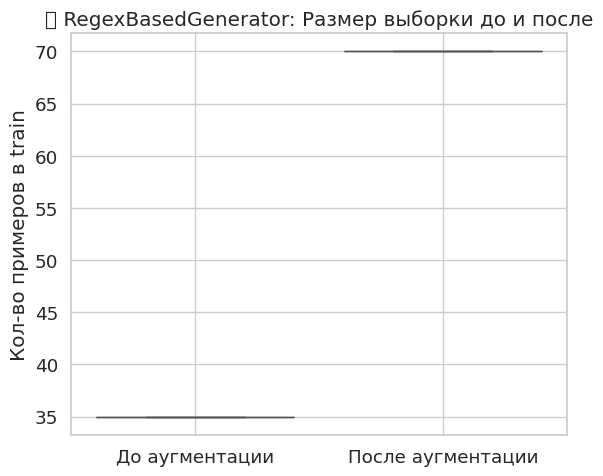

<ipython-input-78-5313fb8f192f>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_class_balance, x="label", y="count", palette="coolwarm")
<ipython-input-78-5313fb8f192f>:95: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


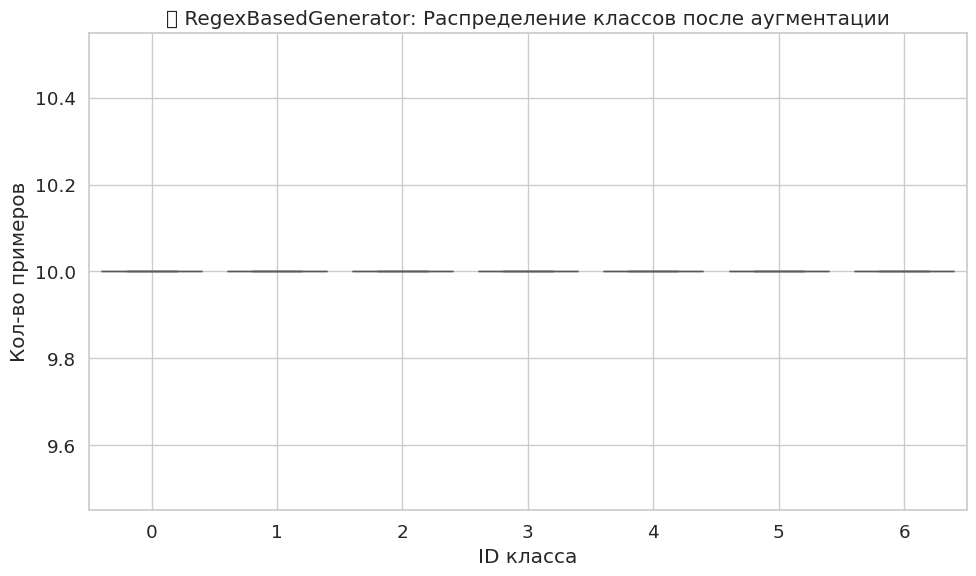

In [ ]:
from autointent import Dataset
my_gen = Generator(base_url='http://193.187.173.33:8002/api/providers/openai/v1', model_name='gpt-3.5-turbo', max_tokens = 500)
regex_generator = RegexBasedGenerator(generator=my_gen, model=model)
title = "RegexBasedGenerator"
run_and_plot_experiments(n_runs = 7, augmenter = regex_generator, dataset = snips, show_diff_fn = show_diff, gen=my_gen, base_scores=base_augment_snips_5_plus_5, new_elems=5, title=title)

мусорка


Пробуем что-то сверху генерить

In [ ]:
class RegexBasedClassLevelGenerator:
    def __init__(self, generator, model, template, nums_for_reg=50, nums_reg=5):
        self.generator = generator
        self.model = model
        self.template = ReSynthesizerTemplateEn
        self.nums_for_reg = nums_for_reg
        self.nums_reg = nums_reg

    def _result_for_one_class(self, texts: list, num_clusters: int):
        embeddings = self.model.encode(texts, convert_to_tensor=True)
        kmeans = KMeans(n_clusters=num_clusters, random_state=1303)
        cluster_labels = kmeans.fit_predict(embeddings.cpu().numpy())
        centroids = kmeans.cluster_centers_
        similarities = cosine_similarity(centroids, embeddings.cpu().numpy())
        closest_indices = similarities.argmax(axis=1)
        centroid_texts = [texts[i] for i in closest_indices]
        return centroid_texts

    def extract_xeger_regexes(self, response: str) -> list[str]:
        lines = response.strip().split("\n")
        return [re.match(r"^\s*\d+\.\s*(.+)$", line).group(1).strip()
                for line in lines if re.match(r"^\s*\d+\.\s*(.+)$", line)]

    def _filter_similar_levenshtein(self, sentences: list[str], threshold: float = 0.9) -> list[str]:
        # return sentences
        unique = []
        for sentence in sentences:
            if all(Levenshtein.ratio(sentence, other) < threshold for other in unique):
                unique.append(sentence)
        return unique

    def generate_sentences_from_regex(self, regexes: list[str], n_per_regex: int = 30) -> list[str]:
        x = Xeger()
        sentences = []
        for regex in regexes:
            try:
                generated = [x.xeger(regex) for _ in range(n_per_regex)]
                sentences.extend(generated)
            except Exception as e:
                print(f"⚠️ Failed on regex: {regex}\n{e}")

        filtered = self._filter_similar_levenshtein(sentences)
        print(f"🧹 Filtered from {len(sentences)} to {len(filtered)} via Levenshtein")
        return filtered

    def extract_numbered_list(self, response: str) -> list[str]:
        lines = response.strip().split("\n")
        return [re.match(r"^\s*\d+\.\s*(.+)$", line).group(1).strip()
                for line in lines if re.match(r"^\s*\d+\.\s*(.+)$", line)]

    def expand_intent_data_for_class(self, intent: str, regexes: list[str], n_clusters: int) -> list[str]:
        generated = self.generate_sentences_from_regex(regexes, n_per_regex=self.nums_for_reg)
        print(f"🎯 Total generated: {len(generated)}")

        selected = self._result_for_one_class(texts=generated, num_clusters=n_clusters)
        # print('✅ Selected:', selected)
        return selected
    def _result_for_one_class_far(self, texts: List[str], num_clusters: int) -> List[str]:
        embeddings = self.model.encode(texts, convert_to_tensor=True)
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        clusters = kmeans.fit_predict(embeddings.cpu().numpy())

        centroids = kmeans.cluster_centers_
        all_embeddings = embeddings.cpu().numpy()

        result = []

        for cluster_id in range(num_clusters):
            cluster_indices = [i for i, c in enumerate(clusters) if c == cluster_id]
            cluster_vecs = all_embeddings[cluster_indices]
            centroid = centroids[cluster_id]

            # Вычисляем косинусное расстояние до центроида
            distances = 1 - cosine_similarity([centroid], cluster_vecs)[0]

            # Выбираем фразу, находящуюся в 80-90 перцентиле по удаленности (не выброс, но и не близкая)
            sorted_idx = np.argsort(distances)
            percentile_80 = int(len(sorted_idx) * 0.8)
            percentile_90 = int(len(sorted_idx) * 0.9)
            if percentile_80 == percentile_90:
                chosen_idx = sorted_idx[percentile_80]
            else:
                chosen_idx = random.choice(sorted_idx[percentile_80:percentile_90])

            result.append(texts[cluster_indices[chosen_idx]])

        return result

    def generate(self, dataset: Dataset, split_name: str = Split.TRAIN, n_final_per_class: int = 3, update_split: bool = True) -> list[dict]:
        original_split = dataset[split_name]
        id_to_name = {intent.id: intent.name for intent in dataset.intents}
        utterances_by_intent = defaultdict(list)

        for sample in original_split:
            utterances_by_intent[sample["label"]].append(sample["utterance"])

        new_samples = []
        augmenter = UtteranceGenerator(self.generator, prompt_maker=self.template(dataset))
        data_exsp = augmenter.augment(dataset, n_generations=self.nums_reg, update_split=False)
        exp_by_intent = defaultdict(list)
        for sample in data_exsp:
            exp_by_intent[sample.label].append(sample.utterance)

        for intent_id, examples in utterances_by_intent.items():
            intent_name = id_to_name[intent_id]
            few_shots = random.sample(examples, min(5, len(examples)))
            print(f"\n🔹 Expanding intent: {intent_name} (id={intent_id})")
            generated_utterances = self.expand_intent_data_for_class(
                intent=intent_name,
                regexes=exp_by_intent[intent_id],
                n_clusters=n_final_per_class
            )
            for utterance in generated_utterances:
                new_samples.append({
                    Dataset.label_feature: intent_id,
                    Dataset.utterance_feature: utterance
                })

        if update_split and new_samples:
            generated_split = HFDataset.from_list(new_samples)
            dataset[split_name] = concatenate_datasets([original_split, generated_split])

        return new_samples
# regex_generator = RegexBasedClassLevelGenerator(generator=generator, model=model)
# shot_data = create_shot_dataframe(snips, n=5)
# base_line = create_shot_dataframe(snips, n=5)
# regex_generator.generate(dataset=shot_data, n_final_per_class=10)
# show_diff(baseline_data=base_line, data_adv=shot_data, test=snips)


🔁 Запуск 1 из 7

🔹 Expanding intent: AddToPlaylist (id=0)
🧹 Filtered from 125 to 77 via Levenshtein
🎯 Total generated: 77

🔹 Expanding intent: BookRestaurant (id=1)
🧹 Filtered from 225 to 92 via Levenshtein
🎯 Total generated: 92

🔹 Expanding intent: GetWeather (id=2)
🧹 Filtered from 225 to 91 via Levenshtein
🎯 Total generated: 91

🔹 Expanding intent: PlayMusic (id=3)
🧹 Filtered from 125 to 95 via Levenshtein
🎯 Total generated: 95

🔹 Expanding intent: RateBook (id=4)
🧹 Filtered from 125 to 69 via Levenshtein
🎯 Total generated: 69

🔹 Expanding intent: SearchCreativeWork (id=5)
🧹 Filtered from 125 to 45 via Levenshtein
🎯 Total generated: 45

🔹 Expanding intent: SearchScreeningEvent (id=6)
🧹 Filtered from 125 to 69 via Levenshtein
🎯 Total generated: 69
Few-shot: {'ac': 0.8292857142857143, 'f1': 0.8252701072768719, 'pre': 0.8293980319946287, 'recall': 0.8292857142857143}
augmentation: {'ac': 0.8428571428571429, 'f1': 0.8403556942300243, 'pre': 0.8437246736357489, 'recall': 0.84285714285714

<ipython-input-14-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="stage", y="value", ax=ax, palette="pastel")
<ipython-input-14-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="stage", y="value", ax=ax, palette="pastel")
<ipython-input-14-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="stage", y="value", ax=ax, palette="pastel")
<ipython-input-14-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

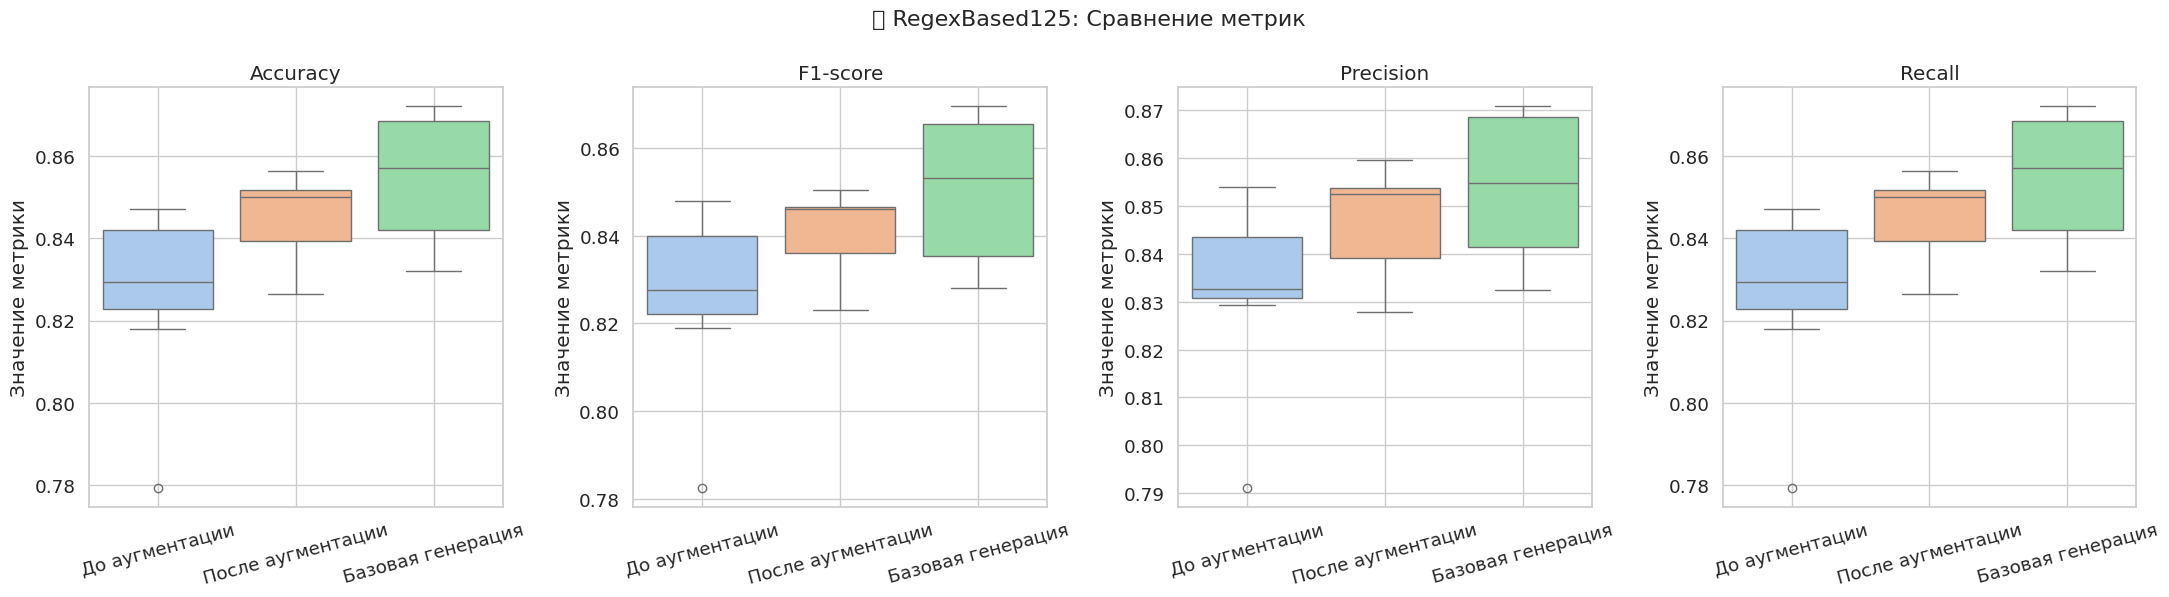

<ipython-input-14-5313fb8f192f>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sizes, x="stage", y="size", palette="muted")
<ipython-input-14-5313fb8f192f>:84: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


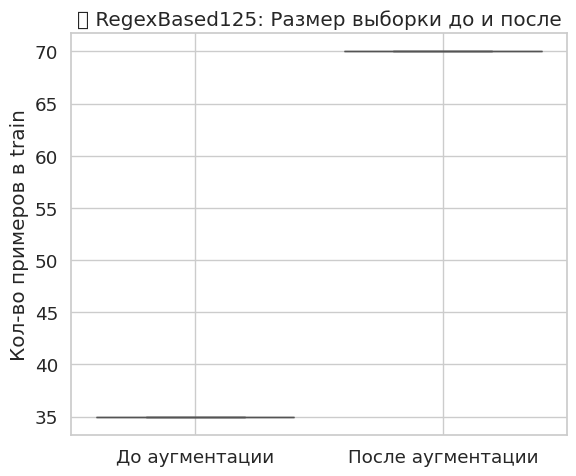

<ipython-input-14-5313fb8f192f>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_class_balance, x="label", y="count", palette="coolwarm")
<ipython-input-14-5313fb8f192f>:95: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


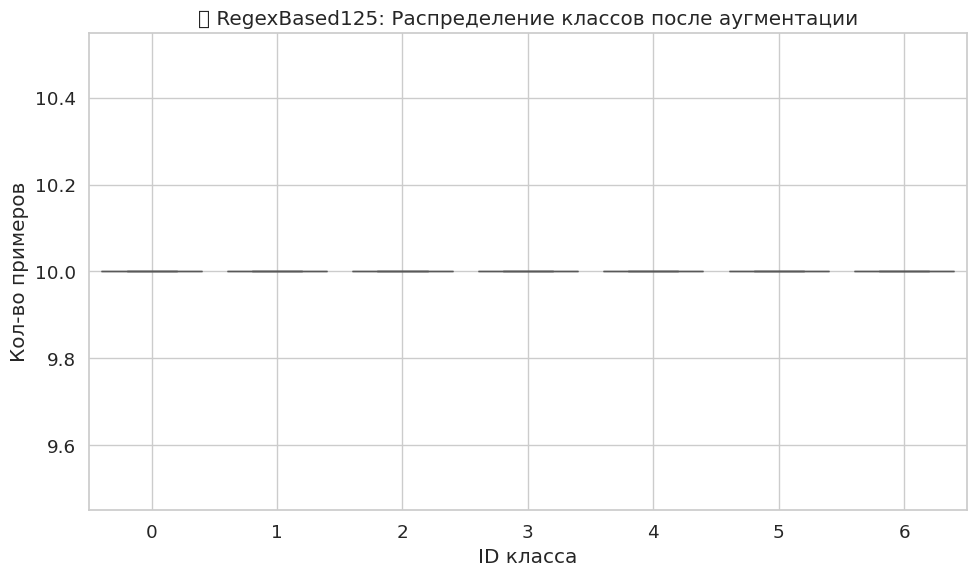

In [ ]:
my_gen = Generator(
    base_url='http://193.187.173.33:8002/api/providers/openai/v1',
    model_name='gpt-3.5-turbo',
    max_tokens = 500
)
nums_reg = 5
nums_for_reg = 25
regex_generator = RegexBasedClassLevelGenerator(nums_reg = nums_reg, nums_for_reg = nums_for_reg, generator=my_gen, model=model, template=ReSynthesizerTemplateEn)
title = f"RegexBased{nums_reg*nums_for_reg}"
run_and_plot_experiments(n_runs = 7, augmenter = regex_generator, dataset = snips, show_diff_fn = show_diff, gen=my_gen, base_scores=base_augment_snips_5_plus_5, new_elems=5, title=title)


🔁 Запуск 1 из 7

🔹 Expanding intent: AddToPlaylist (id=0)
🧹 Filtered from 125 to 117 via Levenshtein
🎯 Total generated: 117

🔹 Expanding intent: BookRestaurant (id=1)
🧹 Filtered from 125 to 114 via Levenshtein
🎯 Total generated: 114

🔹 Expanding intent: GetWeather (id=2)
🧹 Filtered from 225 to 85 via Levenshtein
🎯 Total generated: 85

🔹 Expanding intent: PlayMusic (id=3)
🧹 Filtered from 125 to 81 via Levenshtein
🎯 Total generated: 81

🔹 Expanding intent: RateBook (id=4)
🧹 Filtered from 125 to 55 via Levenshtein
🎯 Total generated: 55

🔹 Expanding intent: SearchCreativeWork (id=5)
🧹 Filtered from 225 to 35 via Levenshtein
🎯 Total generated: 35

🔹 Expanding intent: SearchScreeningEvent (id=6)
🧹 Filtered from 125 to 97 via Levenshtein
🎯 Total generated: 97
Few-shot: {'ac': 0.8378571428571429, 'f1': 0.8350801775874777, 'pre': 0.8425619943570624, 'recall': 0.8378571428571429}
augmentation: {'ac': 0.8321428571428572, 'f1': 0.8295763148783111, 'pre': 0.8320854580901939, 'recall': 0.8321428571

<ipython-input-14-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="stage", y="value", ax=ax, palette="pastel")
<ipython-input-14-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="stage", y="value", ax=ax, palette="pastel")
<ipython-input-14-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="stage", y="value", ax=ax, palette="pastel")
<ipython-input-14-5313fb8f192f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

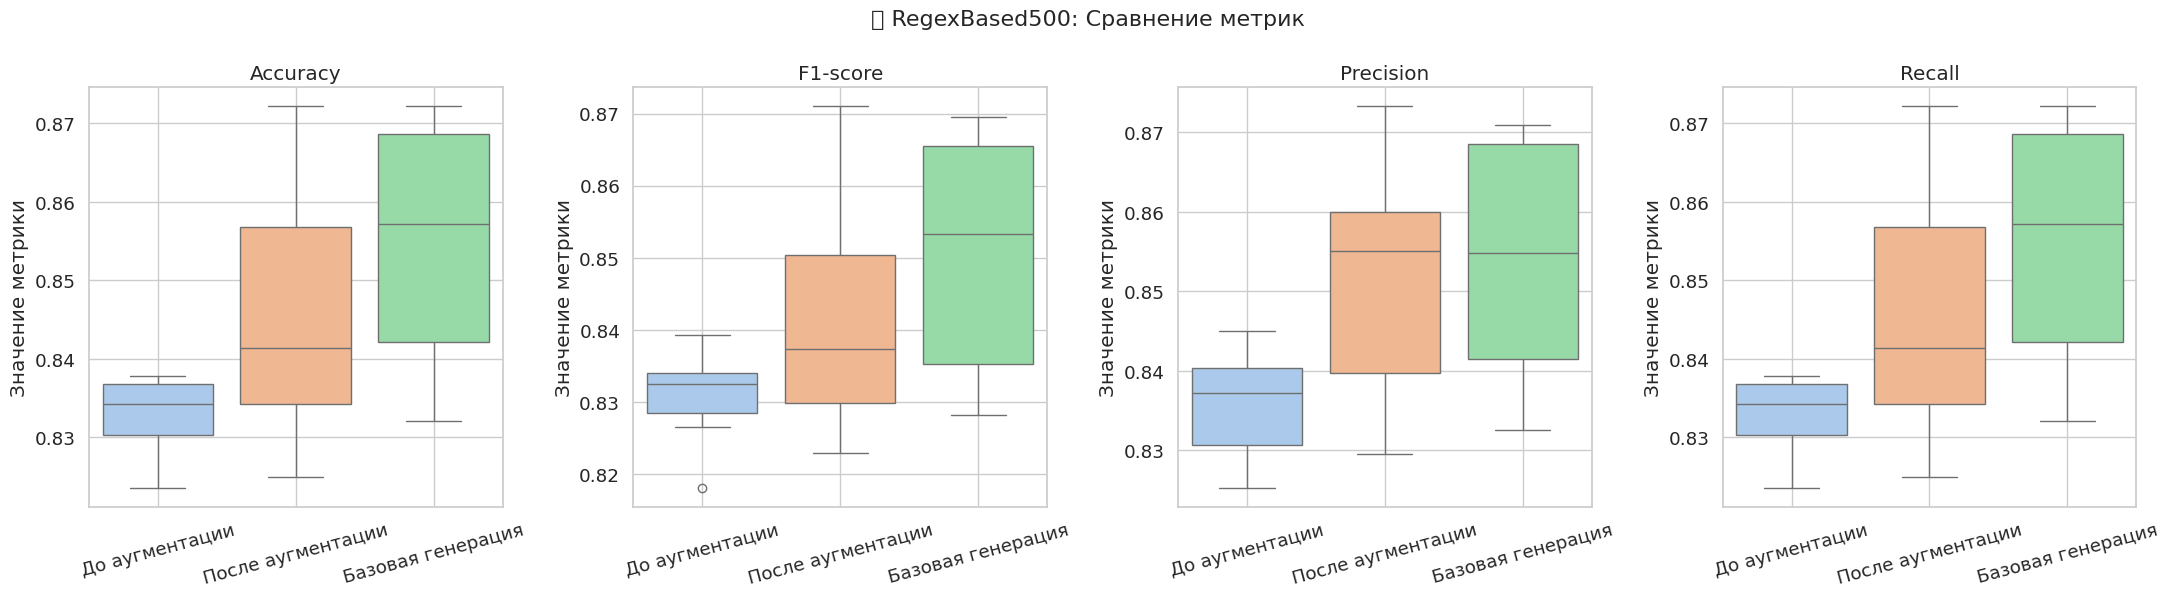

<ipython-input-14-5313fb8f192f>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sizes, x="stage", y="size", palette="muted")
<ipython-input-14-5313fb8f192f>:84: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


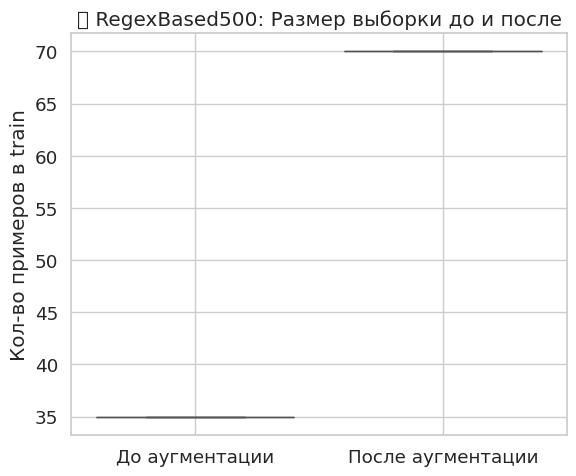

<ipython-input-14-5313fb8f192f>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_class_balance, x="label", y="count", palette="coolwarm")
<ipython-input-14-5313fb8f192f>:95: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


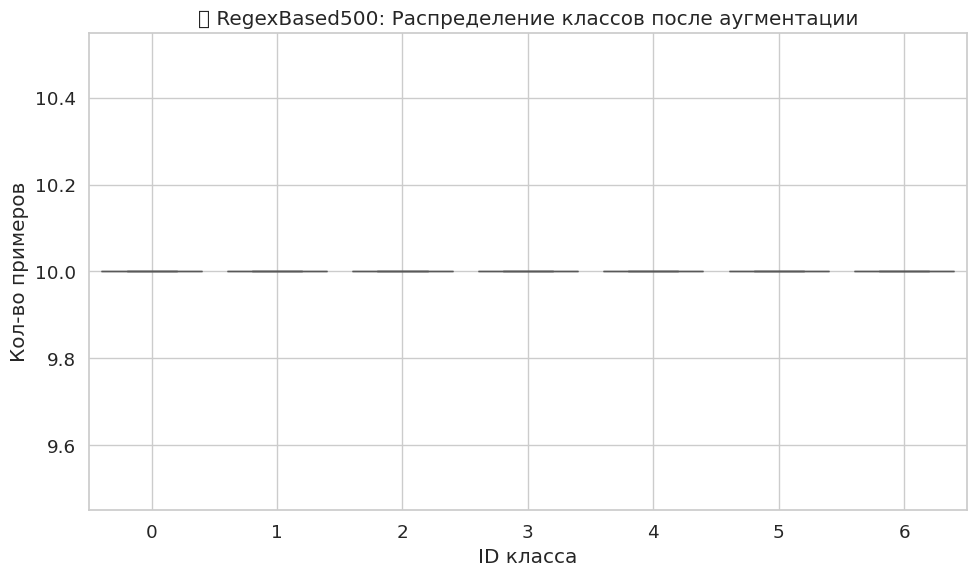

In [ ]:
my_gen = Generator(
    base_url='http://193.187.173.33:8002/api/providers/openai/v1',
    model_name='gpt-3.5-turbo',
    max_tokens = 500
)
regex_generator = RegexBasedClassLevelGenerator(generator=my_gen, model=model, template=ReSynthesizerTemplate)
title = "RegexBased500"
run_and_plot_experiments(n_runs = 7, augmenter = regex_generator, dataset = snips, show_diff_fn = show_diff, gen=my_gen, base_scores=base_augment_snips_5_plus_5, new_elems=5, title=title)

In [ ]:
class RegexBasedFarFromOtherClassesGenerator:
    def __init__(self, generator, model, template, nums_reg:5, nums_for_reg:50):
        self.generator = generator
        self.model = model
        self.template = template


    def extract_xeger_regexes(self, response: str) -> list[str]:
        lines = response.strip().split("\n")
        return [re.match(r"^\s*\d+\.\s*(.+)$", line).group(1).strip()
                for line in lines if re.match(r"^\s*\d+\.\s*(.+)$", line)]

    def _filter_similar_levenshtein(self, sentences: list[str], threshold: float = 0.9) -> list[str]:
        return sentences

    def generate_sentences_from_regex(self, regexes: list[str], n_per_regex: int = 30) -> list[str]:
        x = Xeger()
        sentences = []
        for regex in regexes:
            try:
                generated = [x.xeger(regex) for _ in range(n_per_regex)]
                sentences.extend(generated)
            except Exception as e:
                print(f"⚠️ Failed on regex: {regex}\n{e}")
        return self._filter_similar_levenshtein(sentences)

    def _select_far_from_other_classes(self, class_texts: List[str], other_embeddings: np.ndarray, n_clusters: int) -> List[str]:
        class_embeddings = self.model.encode(class_texts, convert_to_tensor=True).cpu().numpy()
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(class_embeddings)

        selected = []
        for cluster_id in range(n_clusters):
            indices = [i for i, label in enumerate(clusters) if label == cluster_id]
            cluster_vecs = class_embeddings[indices]
            avg_distances = 1 - cosine_similarity(cluster_vecs, other_embeddings).mean(axis=1)
            sorted_idx = np.argsort(avg_distances)[-1]
            selected.append(class_texts[indices[sorted_idx]])
        return selected

    def generate(self, dataset: Dataset, split_name: str = Split.TRAIN,
                 n_final_per_class: int = 3, update_split: bool = True) -> List[dict]:
        original_split = dataset[split_name]
        id_to_name = {intent.id: intent.name for intent in dataset.intents}
        utterances_by_intent = defaultdict(list)

        for sample in original_split:
            utterances_by_intent[sample["label"]].append(sample["utterance"])

        all_other_embeddings = {}
        for intent_id, utts in utterances_by_intent.items():
            other_utts = [u for i, l in utterances_by_intent.items() if i != intent_id for u in l]
            all_other_embeddings[intent_id] = self.model.encode(other_utts, convert_to_tensor=True).cpu().numpy()

        augmenter = UtteranceGenerator(self.generator, prompt_maker=self.template(dataset))
        data_exp = augmenter.augment(dataset, n_generations=self.nums_reg, update_split=False)
        exp_by_intent = defaultdict(list)
        for sample in data_exp:
            exp_by_intent[sample.label].append(sample.utterance)

        new_samples = []

        for intent_id, examples in utterances_by_intent.items():
            intent_name = id_to_name[intent_id]
            print(f"\n🔹 Processing intent: {intent_name} (id={intent_id})")

            regexes = exp_by_intent[intent_id]
            generated = self.generate_sentences_from_regex(regexes, n_per_regex=1000)

            selected = self._select_far_from_other_classes(
                class_texts=generated,
                other_embeddings=all_other_embeddings[intent_id],
                n_clusters=n_final_per_class
            )

            for utterance in selected:
                new_samples.append({
                    Dataset.label_feature: intent_id,
                    Dataset.utterance_feature: utterance
                })

        if update_split and new_samples:
            generated_split = HFDataset.from_list(new_samples)
            dataset[split_name] = concatenate_datasets([original_split, generated_split])

        return new_samples
